In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import csv
from collections import defaultdict

In [2]:
inst_to_type = {'Australian National University': 'Academia', 'Deakin University': 'Academia', 'Queensland University of Technology': 'Academia', 'University of Adelaide': 'Academia', 'University of Melbourne': 'Academia', 'University of New South Wales': 'Academia', 'University of Queensland': 'Academia', 'University of Sydney': 'Academia', 'University of Technology Sydney': 'Academia', 'Monash University': 'Academia', 'University of South Australia': 'Academia', 'Grifﬁth University': 'Academia', 'Data61': 'Company', 'CSIRO': 'Government', 'Telstra Research Laboratories': 'Government', 'Institute of Science and Technology Austria': 'Academia', 'Johannes Kepler University': 'Academia', 'TU Graz': 'Academia', 'University Linz': 'Academia', 'University of Salzburg': 'Academia', 'Vienna University of Technology': 'Academia', 'University of Vienna': 'Academia', 'Alpen-Adria University': 'Academia', 'Austrian Institute of Technology': 'Government', 'Ghent University': 'Academia', 'KU Leuven': 'Academia', 'Vrije Universiteit Brussel': 'Academia', 'NGDATA-Europe': 'Company', 'Federal University of Sao Paulo': 'Academia', 'PUC-Rio': 'Academia', 'Dalhousie University': 'Academia', 'Ecole Polytechnique de Montreal': 'Academia', 'McMaster University': 'Academia', 'Simon Fraser University': 'Academia', 'Universite Laval': 'Academia', 'University of Alberta': 'Academia', 'University of British Columbia': 'Academia', 'University of Montreal': 'Academia', 'University of Ottawa': 'Academia', 'University of Toronto': 'Academia', 'University of Waterloo': 'Academia', 'University of Guelph': 'Academia', 'York University': 'Academia', 'University of Victoria': 'Academia', 'Universit´e de Sherbrooke': 'Academia', 'Quest University': 'Academia', 'D-Wave': 'Company', 'layer6': 'Company', 'Borealis AI': 'Company', 'CIRANO': 'Independent Research', 'Universidad de Chile': 'Academia', 'Anhui University': 'Academia', 'Beijing Institute of Technology': 'Academia', 'Beijing Jiaotong University': 'Academia', 'Beijing Normal University': 'Academia', 'Beijing University of Posts and Telecommunications': 'Academia', 'Chinese Academy of Sciences': 'Academia', 'Dalian University of Technology': 'Academia', 'East China Normal University': 'Academia', 'Fudan University': 'Academia', 'Huazhong Univ. of Sci. and Tech.': 'Academia', 'Nanjing University': 'Academia', 'Nanjing University of Aeronautics and Astronautics': 'Academia', 'National University of Defense Technology': 'Academia', 'Northwestern Polytechnical University': 'Academia', 'Peking University': 'Academia', 'Shanghai Jiaotong University': 'Academia', 'Shanghai University': 'Academia', 'ShanghaiTech University': 'Academia', 'Shenzhen Graduate School': 'Academia', 'Sichuan University': 'Academia', 'Southern University of Science and Technology': 'Academia', 'Sun Yat-sen University': 'Academia', 'Tsinghua University': 'Academia', 'University of Science and Technology of China': 'Academia', "Xi'an Jiaotong University": 'Academia', 'Xidian University': 'Academia', 'Zhejiang University': 'Academia', 'Tianjin University': 'Academia', 'Harbin Institute of Technology': 'Academia', 'Soochow University': 'Academia', 'Jilin University': 'Academia', 'Dalian Maritime University': 'Academia', 'Guizhou University': 'Academia', 'Changchun Institute of Technology': 'Academia', 'China University of Geosciences': 'Academia', 'Alibaba': 'Company', 'Baidu': 'Company', 'DJI': 'Company', 'Huawei': 'Company', 'Qihoo 360': 'Company', 'SenseTime Group Ltd.': 'Company', 'Tencent': 'Company', 'Lenovo': 'Company', 'Key Laboratory of Symbolic Computation and Knowledge Engineering of Ministry of Education': 'Government', 'Universidad Nacional de Colombia': 'Academia', 'Czech Technical University': 'Academia', 'IT University of Copenhagen': 'Academia', 'Technical University of Denmark': 'Academia', 'University of Copenhagen': 'Academia', 'FindZebra': 'Company', 'Aalto University': 'Academia', 'Helsinki University of Technology': 'Academia', 'University of Helsinki': 'Academia', 'University of Jyvaskylat': 'Academia', 'Curious AI Company': 'Company', 'Nokia': 'Company', 'VTT Technical Research Centre of Finland': 'Government', 'Aix-Marseille Universit?e': 'Academia', 'Ecole Normale Superieure': 'Academia', 'École Polytechnique': 'Academia', 'EPFL': 'Academia', 'INSA de Rouen': 'Academia', 'INSEAD': 'Academia', 'Institut Universitaire de France': 'Academia', 'Jean Monnet University': 'Academia', 'PSL Research University': 'Academia', 'Supélec': 'Academia', 'Telecom ParisTech': 'Academia', 'Universit? Joseph Fourier': 'Academia', 'Universit?e de Rouen': 'Academia', 'Universit?e de Technologie de Compi`egne': 'Academia', 'Universit?e Paris VI': 'Academia', 'Universit?e Paris-Sud': 'Academia', 'Universit?e Pierre et Marie Curie': 'Academia', 'Universit?e Ren?e Descartes': 'Academia', 'Universite Bordeaux': 'Academia', "Universite Cote d'Azur": 'Academia', 'Universite de Bretagne Sud': 'Academia', 'Universite de Lorraine': 'Academia', 'Université de Lyon': 'Academia', 'Universite de Rouen': 'Academia', 'Universite de Technologie de Compiegne': 'Academia', 'Universite Paris-Saclay': 'Academia', 'Universite Pierre et Marie Curie': 'Academia', 'Universite St Etienne': 'Academia', 'University of Grenoble': 'Academia', 'University of Lille': 'Academia', 'University Paris Descartes': 'Academia', 'Universit´e Paris-Est': 'Academia', 'Ecole des Ponts ParisTech': 'Academia', 'University of Artois': 'Academia', 'Paris Dauphine University': 'Academia', 'France-Telecom': 'Company', 'La Poste/SRTP': 'Company', 'Orange Telecom': 'Company', 'Sanoﬁ': 'Company', 'Centre de Recherche Cerveau & Cognition': 'Government', 'CNRS': 'Government', 'Georges-Pompidou European Hospital': 'Government', 'INRIA': 'Government', 'Institut de Physique Théorique': 'Government', 'Irstea': 'Government', 'lip6.fr': 'Government', 'LORIA': 'Government', 'ATR Computational Neuroscience Laboratories': 'Independent Research', 'Bosch GmbH': 'Company', 'Berlin Institute of Technology': 'Academia', 'Friedrich Schiller University Jena': 'Academia', 'Gerhard-Mercator-University Duisburg': 'Academia', 'Goethe-University Frankfurt': 'Academia', 'Heidelberg University': 'Academia', 'Humboldt University': 'Academia', 'Karlsruhe Institute of Technology': 'Academia', 'Ludwig-Maximilians-University': 'Academia', 'Medical School Hannover': 'Academia', 'Ruprecht-Karls-Universit?at Heidelberg': 'Academia', 'RWTH Aachen': 'Academia', 'Saarland University': 'Academia', 'Technical University Berlin': 'Academia', 'Technical University Darmstadt': 'Academia', 'Technical University of Berlin': 'Academia', 'TU Chemnitz': 'Academia', 'TU Darmstadt': 'Academia', 'TU Dresden': 'Academia', 'TU Munchen': 'Academia', 'Universitat Frankfurt': 'Academia', 'Universitat Ulm': 'Academia', 'University G?ottingen': 'Academia', 'University Medicine Berlin': 'Academia', 'University of Bielefeld': 'Academia', 'University of Bonn': 'Academia', 'University of Bremen': 'Academia', 'University of Freiburg': 'Academia', 'University of Hamburg': 'Academia', 'University of Kiel': 'Academia', 'University of Oldenburg': 'Academia', 'University of Potsdam': 'Academia', 'University of Tubingen': 'Academia', 'Marburg University': 'Academia', 'Freie Universit¨at Berlin': 'Academia', 'Jacobs University Bremen': 'Academia', 'University of Paderborn': 'Academia', 'LIFE Biosystems GmbH': 'Company', 'Robert Bosch': 'Company', 'Siemens': 'Company', 'Volkswagen': 'Company', 'German National Research Center for Computer Science (GMD)': 'Government', 'University of Stuttgart': 'Government', 'Central Institute of Mental Health': 'Independent Research', 'Centrum Wiskunde & Informatica': 'Independent Research', 'Fraunhofer First': 'Independent Research', 'Helmholtz-Zentrum Dresden-Rossendorf e.V.': 'Independent Research', 'Max Planck Society': 'Independent Research', 'Athens University of Economics and Business': 'Academia', 'Technical University of Crete': 'Academia', 'Cyprus University of Technology': 'Academia', 'Chinese University of Hong Kong': 'Academia', 'City University of Hong Kong': 'Academia', 'Hong Kong Baptist University': 'Academia', 'Hong Kong University of Science and Technology': 'Academia', 'Hong Kong University of Science and Technology, Hong Kong': 'Academia', 'The Chinese University of Hong Kong': 'Academia', 'Hong Kong Polytechnic University': 'Academia', 'The University of Hong Kong': 'Academia', 'Hong Kong Observatory': 'Government', 'Technical University of Budapest': 'Academia', 'Gravity R&D': 'Company', 'I.I.T. Bombay': 'Academia', 'I.I.T. Delhi': 'Academia', 'IIIT Hyderabad': 'Academia', 'IIT Kanpur': 'Academia', 'IIT Madras': 'Academia', 'Indian Institute of Science': 'Academia', 'Lahore University of Management Sciences': 'Academia', 'ERNET': 'Government', 'University College Dublin': 'Academia', 'University College Cork': 'Academia', 'Ariel University': 'Academia', 'Bar-Ilan University': 'Academia', 'Ben Gurion University': 'Academia', 'Ben-Gurion University of the Negev': 'Academia', 'Hebrew University': 'Academia', 'Open University of Israel': 'Academia', 'Technion': 'Academia', 'Tel Aviv University': 'Academia', 'Weizmann Institute of Science': 'Independent Research', 'International School for Advanced Studies': 'Academia', 'Politecnico di Milano': 'Academia', 'Rome University': 'Academia', 'Sapienza University': 'Academia', 'Universit`a dell?Insubria': 'Academia', 'Universit`a di Genova': 'Academia', 'Universit`a di Milano': 'Academia', 'Universit`a di Modena': 'Academia', 'Universita degli Studi di Milano': 'Academia', 'University of Florence': 'Academia', 'University of Genoa': 'Academia', 'University of Milan': 'Academia', 'University of Padova': 'Academia', 'University of Perugia': 'Academia', 'University of Pisa': 'Academia', 'University of Rome': 'Academia', 'University of Siena': 'Academia', 'University of Trento': 'Academia', 'University of Salerno': 'Academia', 'Politecnico di Torino': 'Academia', 'Free University of Bozen-Bolzano': 'Academia', 'University of Brescia': 'Academia', 'University of Roma': 'Academia', 'Italian National Inst. of Health': 'Government', 'Istituto Italiano di Tecnologia': 'Independent Research', 'Istituto per La Ricerca': 'Independent Research', 'Hiroshima City University': 'Academia', 'Hiroshima University': 'Academia', 'Hokkaido University': 'Academia', 'Hosei University': 'Academia', 'Kanagawa University': 'Academia', 'Keio University': 'Academia', 'Kyoto Prefecture University': 'Academia', 'Kyoto University': 'Academia', 'Kyushu Institute of Technology': 'Academia', 'Nagoya Institute of Technology': 'Academia', 'Nara Institute of Science and Technology': 'Academia', 'Osaka University': 'Academia', 'Tohoku University': 'Academia', 'Tokai University': 'Academia', 'Tokyo Inst. of Tech.': 'Academia', 'Tokyo Metropolitan University': 'Academia', 'Tsukuba University': 'Academia', 'University of Tokyo': 'Academia', 'University of Hyogo': 'Academia', 'Ritsumeikan University': 'Academia', 'Kyushu University': 'Academia', 'Fujitsu': 'Company', 'Mitsubishi': 'Company', 'NEC': 'Company', 'Nikon Corporation': 'Company', 'NTT': 'Company', 'Panasonic': 'Company', 'Ricoh': 'Company', 'Sharp': 'Company', 'Sony': 'Company', 'Sumitomo mitsui': 'Company', 'Toyota': 'Company', 'Institute of Statistical Mathematics': 'Government', 'Japan Science and Technology Agency': 'Government', 'National Institute of Informatics': 'Government', 'RIKEN': 'Government', 'The Institute of Statistical Mathematics Japan': 'Government', 'University of Luxembourg': 'Academia', 'Eindhoven University of Technology': 'Academia', 'Leiden University': 'Academia', 'Radboud University': 'Academia', 'University of Amsterdam': 'Academia', 'University of Nijmegen': 'Academia', 'Wageningen University': 'Academia', 'Philips': 'Company', 'The University of Auckland': 'Academia', 'Norwegian University of Life Sciences': 'Academia', 'University of Oslo': 'Academia', 'Poznan University of Technology': 'Academia', 'Jagiellonian University': 'Academia', 'University of Warsaw': 'Academia', 'University of Coimbra': 'Academia', 'University of Porto': 'Academia', 'University of Minho': 'Academia', 'Universidade Nova de Lisboa': 'Academia', 'INESC-ID': 'Independent Research', 'Qatar Computing Research Institute': 'Independent Research', 'Higher School of Economics': 'Academia', 'Moscow Institute of Physics and Technology': 'Academia', 'Yandex': 'Company', 'Skolkovo Institute of Science and Technology': 'Academia', 'Russian Academy of Sciences': 'Government', 'Nanyang Technological University': 'Academia', 'National University of Singapore': 'Academia', 'Singapore Management University': 'Academia', 'Singapore University of Technology and Design': 'Academia', 'A*STAR': 'Government', 'DSO National Laboratories': 'Government', 'KAIST': 'Academia', 'Myong Ji University': 'Academia', 'Pohang University of Science and Technology': 'Academia', 'Seoul National University': 'Academia', 'Lunit Inc.': 'Company', 'NAVER': 'Company', 'Samsung': 'Company', 'SK T-Brain': 'Company', 'Electronics and Telecommunications Research Institute': 'Government', 'Universidad Carlos ill de Madrid': 'Academia', 'Universitat de Valencia': 'Academia', 'Universitat Politechnica Catalunya': 'Academia', 'Universitat Pompeu Fabra': 'Academia', 'Universidad de Zaragoza': 'Academia', 'Universidad Politécnica de Madrid': 'Academia', 'ICREA': 'Government', 'Institute of Microelectronics of Barcelona IMB-SNM': 'Government', 'Chalmers University': 'Academia', 'KTH Royal Institute of Technology': 'Academia', 'Lund University': 'Academia', 'Uppsala University': 'Academia', 'Link¨oping University': 'Academia', 'Spotify': 'Company', 'NORDITA': 'Government', 'ETH Zurich': 'Academia', 'Universita della Svizzera italiana': 'Academia', 'University of Basel': 'Academia', 'University of Bern': 'Academia', 'University of Geneva': 'Academia', 'IDSIA': 'Government', 'Idiap Research Institute': 'Independent Research', 'Academia Sinica': 'Academia', 'National Taiwan University': 'Academia', 'Boğaziçi University': 'Academia', 'Sabancı University': 'Academia', 'Aston University': 'Academia', 'Imperial College London': 'Academia', "King's College London": 'Academia', 'London School of Economics': 'Academia', 'Newcastle University': 'Academia', 'Univ. of Hertfordshire': 'Academia', 'University College London': 'Academia', 'University of Birmingham': 'Academia', 'University of Bristol': 'Academia', 'University of Cambridge': 'Academia', 'University of Edinburgh': 'Academia', 'University of Glasgow': 'Academia', 'University of London': 'Academia', 'University of Newcastle': 'Academia', 'University of Nottingham': 'Academia', 'University of Oxford': 'Academia', 'University of Plymouth': 'Academia', 'University of Sheffield': 'Academia', 'University of Southampton': 'Academia', 'University of St. Andrews': 'Academia', 'University of Stirling': 'Academia', 'University of Sussex': 'Academia', 'University of Warwick': 'Academia', 'University of York': 'Academia', 'Western University': 'Academia', 'Heriot-Watt University': 'Academia', 'University of Manchester': 'Academia', 'University of Aberdeen': 'Academia', 'Barclays': 'Company', 'Prowler.io': 'Company', 'Alan Turing Institute': 'Government', 'Defence Evaluation & Research Agency': 'Government', 'Szkocka Research Group': 'Independent Research', 'Universidad de la Rep´ublica, Uruguay': 'Academia', 'Arizona State University': 'Academia', 'Boston University': 'Academia', 'Brandeis University': 'Academia', 'Brigham Young University': 'Academia', 'Brown University': 'Academia', 'Caltech': 'Academia', 'Carnegie Mellon': 'Academia', 'College of William & Mary': 'Academia', 'Colorado State University': 'Academia', 'Columbia University': 'Academia', 'Cornell': 'Academia', 'Dartmouth College': 'Academia', 'Duke University': 'Academia', 'Florida State University': 'Academia', 'Franklin. W. Olin College of Engineering': 'Academia', 'George Mason University': 'Academia', 'Georgetown University': 'Academia', 'Georgia Institute of Technology': 'Academia', 'Georgia State University': 'Academia', 'Harvard University': 'Academia', 'Indiana University': 'Academia', 'Iowa State University': 'Academia', 'Johns Hopkins University': 'Academia', 'Massachusetts Institute of Technology': 'Academia', 'McGill University': 'Academia', 'Michigan State University': 'Academia', 'Michigan Technological University': 'Academia', 'New York University': 'Academia', 'North Carolina State University': 'Academia', 'Northeastern University': 'Academia', 'Northwestern University': 'Academia', 'Ohio State University': 'Academia', 'Oklahoma State University': 'Academia', 'Oregon Graduate Institute of Science and Technology': 'Academia', 'Oregon Health & Science University': 'Academia', 'Oregon State University': 'Academia', 'Pennsylvania State University': 'Academia', 'Princeton University': 'Academia', 'Purdue University': 'Academia', 'Rensselaer Polytechnic Institute': 'Academia', 'Rice University': 'Academia', 'Rutgers University': 'Academia', 'Santa Clara University': 'Academia', 'Stanford University': 'Academia', 'Stony Brook University': 'Academia', 'SUNY Buffalo': 'Academia', 'Syracuse University': 'Academia', 'Temple University': 'Academia', 'Tufts University': 'Academia', 'UC Berkeley': 'Academia', 'UC Davis': 'Academia', 'UC Irvine': 'Academia', 'UC Los Angeles': 'Academia', 'UC Merced': 'Academia', 'UC San Diego': 'Academia', 'UC San Francisco': 'Academia', 'UC Santa Barbara': 'Academia', 'UC Santa Cruz': 'Academia', 'University at Albany': 'Academia', 'University at Buffalo': 'Academia', 'University of Arizona': 'Academia', 'University of California, Los Angeles': 'Academia', 'University of Chicago': 'Academia', 'University of Colorado': 'Academia', 'University of Florida': 'Academia', 'University of Hawaii': 'Academia', 'University of Illinois at Chicago': 'Academia', 'University of Illinois at Urbana-Champaign': 'Academia', 'University of Iowa': 'Academia', 'University of Maryland': 'Academia', 'University of Massachusetts Amherst': 'Academia', 'University of Michigan': 'Academia', 'University of Minnesota': 'Academia', 'University of Missouri': 'Academia', 'University of New Mexico': 'Academia', 'University of North Carolina': 'Academia', 'University of North Carolina at Chapel Hill': 'Academia', 'University of North Texas': 'Academia', 'University of Notre Dame': 'Academia', 'University of Pennsylvania': 'Academia', 'University of Pittsburgh': 'Academia', 'University of Rochester': 'Academia', 'University of Southern California': 'Academia', 'University of Texas at Arlington': 'Academia', 'University of Texas at Austin': 'Academia', 'University of Utah': 'Academia', 'University of Vermont': 'Academia', 'University of Virginia': 'Academia', 'University of Washington': 'Academia', 'University of Wisconsin-Madison': 'Academia', 'UT Arlington': 'Academia', 'UT Dallas': 'Academia', 'Virginia Tech': 'Academia', 'Wake Forest University': 'Academia', 'Washington University in St. Louis': 'Academia', 'West Virginia University': 'Academia', 'Willamette University': 'Academia', 'Wright State University': 'Academia', 'Yale University': 'Academia', 'Texas A&M University, College Station': 'Academia', 'University of Texas M.D.Anderson Cancer Center, The': 'Academia', 'Vanderbilt': 'Academia', 'Emory University': 'Academia', 'Baylor College of Medicine': 'Academia', 'Virginia Polytechnic Institute and State University': 'Academia', 'University of South Florida, Tampa': 'Academia', 'University of Alabama at Birmingham, The': 'Academia', 'Mount Sinai School of Medicine': 'Academia', 'University of Texas Southwestern Medical Center, The': 'Academia', 'University of Cincinnati': 'Academia', 'Case Western Reserve University': 'Academia', 'University of Georgia': 'Academia', 'Scripps Research Institute, The': 'Academia', 'University of Miami': 'Academia', 'University of Kentucky': 'Academia', 'Washington State University': 'Academia', 'Rockefeller University, The': 'Academia', 'University of Kansas': 'Academia', 'Louisiana State University, Baton Rouge': 'Academia', 'Bryn Mawr College': 'Academia', 'University of Oregon': 'Academia', 'UC Riverside': 'Academia', 'University of Lousiana at Lafayette': 'Academia', 'Harvey Mudd College': 'Academia', 'Loyola Marymount University': 'Academia', 'North Carolina A&T State University': 'Academia', 'University of Masschusetts Lowell': 'Academia', 'Rochester Institute of Technology': 'Academia', 'The University of Southern Mississippi': 'Academia', 'University of New Hampshire': 'Academia', 'University of Nebraska-Lincoln': 'Academia', 'Catholic University of America': 'Academia', 'University of Central Arkansas': 'Academia', 'University of Hartford': 'Academia', 'University of Connecticut': 'Academia', 'University of Denver': 'Academia', 'Texas Tech University': 'Academia', 'Southern Illinois University': 'Academia', 'University of Houston': 'Academia', 'New Mexico State University': 'Academia', 'University of Central Florida': 'Academia', 'Mississippi State University': 'Academia', 'University of Akron': 'Academia', 'Kansas State University': 'Academia', 'University of Delaware': 'Academia', 'Adobe': 'Company', 'Amazon': 'Company', 'Apple': 'Company', 'Arithmos, Inc.': 'Company', 'ASAPP': 'Company', 'AT &T Bell Laboratories': 'Company', 'Citadel': 'Company', 'DE Shaw': 'Company', 'Disney': 'Company', 'DuPont Pharmaceuticals': 'Company', 'Expedia': 'Company', 'ExxonMobil': 'Company', 'Facebook': 'Company', 'Google': 'Company', 'Hearst': 'Company', 'IBM': 'Company', 'International Remote Imaging Systems': 'Company', 'Kodak': 'Company', 'Language Computer Corporation': 'Company', 'LinkedIn': 'Company', 'LogicBlox': 'Company', 'Lucent': 'Company', 'Microelectronics and Computer Technology Corporation': 'Company', 'Microsoft': 'Company', 'N.A.P. Inc.': 'Company', 'Nestor, Inc.': 'Company', 'Northrop Grumman Corp.': 'Company', 'NVIDIA': 'Company', 'Pavilion Technologies': 'Company', 'Petuum': 'Company', 'Salesforce': 'Company', 'Sarnoff Corporation': 'Company', 'SAS Institute, Inc.': 'Company', 'Science Applications International Corporation': 'Company', 'Siemens Corporate Research, Inc.': 'Company', 'Sun Microsystems': 'Company', 'Synaptics': 'Company', 'Thinking Machines Corporation': 'Company', 'Twitter': 'Company', 'Uber': 'Company', 'Vicarious FPC Inc.': 'Company', 'Yahoo! Inc.': 'Company', 'VMWare': 'Company', 'Basis Technology': 'Company', 'Netflix': 'Company', 'iRobot': 'Company', 'Raytheon': 'Company', 'Accenture': 'Company', 'Nuance Communications': 'Company', 'Autodesk': 'Company', 'General Electric': 'Company', 'Berkeley Lab': 'Government', 'Brookhaven National Laboratory': 'Government', 'Los Alamos National Lab': 'Government', 'NASA': 'Government', 'National Eye Institute': 'Government', 'National Institute of Mental Health': 'Government', 'Naval Health Research Center': 'Government', 'Naval Ocean Systems Center': 'Government', 'Naval Research Laboratory': 'Government', 'NIH': 'Government', 'Oak Ridge National Laboratories': 'Government', 'United States Naval Academy': 'Government', 'Air Force Institute of Technology': 'Government', 'Cold Spring Harbor Lab': 'Independent Research', 'Flatiron Institute': 'Independent Research', 'Howard Hughes Medical Institute': 'Independent Research', 'Laureate Institute for Brain Research': 'Independent Research', 'Mayo Clinic': 'Independent Research', 'Open AI': 'Independent Research', 'Salk Institute': 'Independent Research', 'Santa Fe Institute': 'Independent Research', 'Smith-Kettlewell Eye Research Inst.': 'Independent Research', 'SRI International': 'Independent Research', 'Memorial Sloan Kettering Cancer Center': 'Independent Research', 'Criteo Research': 'Independent Research', 'Palo Alto Research Center': 'Independent Research', 'CloudWalk': 'Company', 'Yitu': 'Company', 'Megvii': 'Company', 'Kyungpook National University': 'Academia', 'University of Haifa': 'Academia', 'Nankai University': 'Academia', 'University of L’Aquila': 'Academia', 'University of Patras': 'Academia', 'University of Liverpool': 'Academia', 'Durham University': 'Academia', 'City University of New York': 'Academia', 'University of Essex': 'Academia', 'Aarhus University': 'Academia', 'University of Louisville': 'Academia', 'University of Bath': 'Academia', 'University of Bologna': 'Academia', 'The University of Tennessee': 'Academia', 'Southeast University': 'Academia', 'University of Granada': 'Academia', 'University of Surrey': 'Academia', 'Delft University of Technology': 'Academia', '¨Ozyeˇgin University': 'Academia', 'Beihang University': 'Academia', 'Korea Advanced Institute of Science and Technology': 'Independent Research', 'South China University of Technology': 'Academia', 'Chongqing University': 'Academia', 'Tongji University': 'Academia', 'University of Electronic Science and Technology of China': 'Academia', 'Xiamen University': 'Academia', 'Fujian Key Laboratory of Sensing and Computing for Smart City': 'Government', 'i2k Connect': 'Company', 'Intuit Inc.': 'Company', 'MassMutual': 'Company', 'Aspiring Minds': 'Company', 'Hitachi Ltd.': 'Company', 'American Family Insurance': 'Company', 'Technische Universität Wien (TU Wien)': 'Academia', 'Lockheed Martin': 'Company', 'Norwegian University of Science and Technology': 'Academia', 'DePauw University': 'Academia', 'Auburn University': 'Academia', 'Tokyo University of Agriculture and Technology': 'Academia', 'Chungbuk National University': 'Academia', 'Cisco Systems': 'Academia', 'Inception Institute of Artiﬁcial Intelligence': 'Government', 'Illinois Institute of Technology': 'Academia', 'VU University Amsterdam': 'Academia', 'Wuhan University of Technology': 'Academia', 'University of Calabria': 'Academia', 'University of Mannheim': 'Academia', 'University of Western Ontario': 'Academia', 'New Jersey Institute of Technology': 'Academia', 'JD.com': 'Company', 'IIIT Delhi': 'Academia', 'Didi': 'Company', 'Ant Financial': 'Company', 'Boise State University': 'Academia', 'Allen Institute for Artiﬁcial Intelligence': 'Independent Research', 'KenSci': 'Company', 'SAP': 'Company', 'Collaborative Innovation Center of Geospatial Technology': 'Government', 'Nanchang University': 'Academia', 'Florida International University': 'Academia', 'Cainiao': 'Company', 'Hunan Engineering Research Center of Machine Vision and Intelligent Medicine': 'Government', 'University of S&T of China': 'Academia', 'Cycorp': 'Company', 'University of Lisbon': 'Academia', 'Swarthmore College': 'Academia', 'Louisiana State University': 'Academia', 'Ctrip': 'Company', 'IIIT Bombay': 'Academia', 'University of Wollongong': 'Academia', 'Korea University': 'Academia', 'University of South Carolina': 'Academia', 'University of Lincoln': 'Academia', 'University of Siegen': 'Academia', 'American University of Beirut': 'Academia', 'Waseda University': 'Academia', 'Air Force Research Laboratory': 'Government', 'U.S. Army Research Laboratory': 'Government', 'Space and Naval Warfare Systems Center': 'Government', 'The University of Texas at El Paso': 'Academia', 'Xiaomi': 'Company', 'Netease': 'Company', 'Sina': 'Company', 'Sohu': 'Company', 'Meitu': 'Company', 'Suning': 'Company', 'iFlyTek': 'Company', 'Daimler': 'Company', 'Walmart Labs': 'Company', 'Sharif University of Technology': 'Academia', 'Intel AI Lab': 'Company', 'Oak Ridge National Lab': 'Government', 'ByteDance': 'Company', 'Airbnb': 'Company'}

In [3]:
inst_to_country = {'Australian National University': 'Australia', 'Australian National U ni versi ty': 'Australia', 'ANU': 'Australia', 'NICTA': 'Australia', 'Deakin University': 'Australia', 'Queensland University of Technology': 'Australia', 'University of Adelaide': 'Australia', 'Univ of Adelaide': 'Australia', 'Univ. of Adelaide': 'Australia', 'University of Melbourne': 'Australia', 'University of New South Wales': 'Australia', 'Univ of New South Wales': 'Australia', 'Univ. of New South Wales': 'Australia', 'UNSW Australia': 'Australia', 'UNSW': 'Australia', '@cse.unsw.edu.au': 'Australia', 'unsw.edu.au': 'Australia', 'University of Queensland': 'Australia', 'University of Sydney': 'Australia', 'Univ of Sydney': 'Australia', 'Univ. of Sydney': 'Australia', 'University of Technology Sydney': 'Australia', 'Univ of Technology Sydney': 'Australia', 'Univ. of Technology Sydney': 'Australia', 'University of Technology, Sydney': 'Australia', 'Monash University': 'Australia', 'University of South Australia': 'Australia', 'Grifﬁth University': 'Australia', 'Data61': 'Australia', 'CSIRO': 'Australia', 'Canberra Laboratory': 'Australia', 'cbr.dit.csiro.au': 'Australia', 'Telstra Research Laboratories': 'Australia', 'Institute of Science and Technology Austria': 'Austria', 'IST Austria': 'Austria', 'Institute of Science and Technology (IST), Austria': 'Austria', 'Johannes Kepler University': 'Austria', 'TU Graz': 'Austria', 'Graz Univ. of Technology': 'Austria', 'Graz University of Technology': 'Austria', 'Technische Universitaet Graz': 'Austria', 'Technische Universitat Graz': 'Austria', 'University Linz': 'Austria', 'Univ Linz': 'Austria', 'Univ. Linz': 'Austria', 'University of Salzburg': 'Austria', 'Univ of Salzburg': 'Austria', 'Univ. of Salzburg': 'Austria', 'Vienna University of Technology': 'Austria', 'University of Vienna': 'Austria', 'Alpen-Adria University': 'Austria', 'Austrian Institute of Technology': 'Austria', 'Ghent University': 'Belgium', 'KU Leuven': 'Belgium', 'Vrije Universiteit Brussel': 'Belgium', 'NGDATA-Europe': 'Belgium', 'Federal University of Sao Paulo': 'Brazil', 'PUC-Rio': 'Brazil', 'Pontifical Catholic University of Rio de Janeiro': 'Brazil', '@INF.PUC-RIO.BR': 'Brazil', 'Dalhousie University': 'Canada', 'Ecole Polytechnique de Montreal': 'Canada', 'McMaster University': 'Canada', 'Simon Fraser University': 'Canada', 'Universite Laval': 'Canada', 'Universit?e Laval': 'Canada', 'Laval University': 'Canada', 'Laval': 'Canada', 'University of Alberta': 'Canada', 'Univ of Alberta': 'Canada', 'Univ. of Alberta': 'Canada', 'University of British Columbia': 'Canada', 'Univ of British Columbia': 'Canada', 'Univ. of British Columbia': 'Canada', 'ubc.ca': 'Canada', 'University of Montreal': 'Canada', 'Univ of Montreal': 'Canada', 'Univ. of Montreal': 'Canada', 'Universit?e de Montr?eal': 'Canada', 'Universite de Montreal': 'Canada', 'Universit? de Montr?al': 'Canada', 'Universit´e de Montr´eal': 'Canada', '@iro.umontreal.ca': 'Canada', 'Université de Montréal': 'Canada', 'Universit de Montral': 'Canada', 'University of Ottawa': 'Canada', 'University of Toronto': 'Canada', 'Univ of Toronto': 'Canada', 'Univ. of Toronto': 'Canada', '@cs.toronto.edu': 'Canada', 'University of Waterloo': 'Canada', 'Univ of Waterloo': 'Canada', 'Univ. of Waterloo': 'Canada', 'University of Guelph': 'Canada', 'York University': 'Canada', 'University of Victoria': 'Canada', 'Universit´e de Sherbrooke': 'Canada', 'Quest University': 'Canada', 'D-Wave': 'Canada', 'layer6': 'Canada', 'Borealis AI': 'Canada', 'CIRANO': 'Canada', 'Universidad de Chile': 'Chile', 'Anhui University': 'China', 'Beijing Institute of Technology': 'China', 'Beijing Institute of Tech': 'China', 'Beijing Jiaotong University': 'China', 'Beijing Normal University': 'China', 'bnu.edu.cn': 'China', 'Beijing University of Posts and Telecommunications': 'China', 'Chinese Academy of Sciences': 'China', 'University of Chinese Academy of Sciences': 'China', 'NLPR, Institute of Automation, Chinese Academy of Sciences': 'China', 'CAS Key lab of Network Data Science & Technology': 'China', 'Dalian University of Technology': 'China', 'East China Normal University': 'China', 'Fudan University': 'China', 'Huazhong Univ. of Sci. and Tech.': 'China', 'Huazhong Univ. of Science and Technology': 'China', 'Huazhong University of Science and Technology': 'China', 'Nanjing University': 'China', 'Nanjing University of Aeronautics and Astronautics': 'China', 'National University of Defense Technology': 'China', 'Northwestern Polytechnical University': 'China', 'Peking University': 'China', 'Shanghai Jiaotong University': 'China', 'Shanghai Jiao Tong University': 'China', 'Shanghai University': 'China', 'ShanghaiTech University': 'China', 'Shenzhen Graduate School': 'China', 'Sichuan University': 'China', 'Southern University of Science and Technology': 'China', 'SUSTech China': 'China', 'Sun Yat-sen University': 'China', 'Tsinghua University': 'China', 'University of Science and Technology of China': 'China', "Xi'an Jiaotong University": 'China', 'XiÕan Jiaotong University': 'China', '@MAIL.XJTU.EDU.CN': 'China', 'Xi’an Jiaotong University': 'China', 'Xidian University': 'China', 'Zhejiang University': 'China', 'Tianjin University': 'China', '@TJU.EDU.CN': 'China', 'Harbin Institute of Technology': 'China', 'Soochow University': 'China', 'Jilin University': 'China', 'Dalian Maritime University': 'China', 'Guizhou University': 'China', 'Changchun Institute of Technology': 'China', 'China University of Geosciences': 'China', 'Alibaba': 'China', 'Baidu': 'China', 'DJI': 'China', 'Huawei': 'China', 'Huawei Technologies Co. Ltd.': 'China', "Noah's Ark Lab": 'China', 'huawei.com': 'China', 'Qihoo 360': 'China', 'SenseTime Group Ltd.': 'China', 'SenseTime': 'China', '@sensetime.com': 'China', 'Tencent': 'China', 'Tencent AI Lab': 'China', 'Lenovo': 'China', 'Lenovo Research & Technology': 'China', '@lenovo.com': 'China', 'Key Laboratory of Symbolic Computation and Knowledge Engineering of Ministry of Education': 'China', 'Universidad Nacional de Colombia': 'Colombia', 'Czech Technical University': 'Czechia', 'IT University of Copenhagen': 'Denmark', 'Technical University of Denmark': 'Denmark', 'Technical Univ. of Denmark': 'Denmark', 'University of Copenhagen': 'Denmark', 'Univ of Copenhagen': 'Denmark', 'Univ. of Copenhagen': 'Denmark', 'Niels Bohr Institute': 'Denmark', 'FindZebra': 'Denmark', 'Aalto University': 'Finland', 'Helsinki University of Technology': 'Finland', 'University of Helsinki': 'Finland', 'Univ of Helsinki': 'Finland', 'Univ. of Helsinki': 'Finland', 'University of Jyvaskylat': 'Finland', 'Curious AI Company': 'Finland', 'Nokia': 'Finland', 'VTT Technical Research Centre of Finland': 'Finland', 'Aix-Marseille Universit?e': 'France', 'Ecole Normale Superieure': 'France', 'ENS': 'France', 'École Normale Supérieure': 'France', 'ens.fr': 'France', 'E?cole Normale Superieure': 'France', 'École Polytechnique': 'France', '?cole Polytechnique,Palaiseau': 'France', '?cole Polytechnique, Palaiseau': 'France', 'EPFL': 'France', 'Ecole polytechnique fédérale de Lausanne': 'France', 'INSA de Rouen': 'France', 'INSEAD': 'France', 'Institut Universitaire de France': 'France', 'Jean Monnet University': 'France', "l'Université Jean Monnet": 'France', 'PSL Research University': 'France', 'Supélec': 'France', 'Sup?lec': 'France', 'Telecom ParisTech': 'France', 'Universit? Joseph Fourier': 'France', 'Universit?e de Rouen': 'France', 'Universit?e de Technologie de Compi`egne': 'France', 'Universit?e Paris VI': 'France', 'Universit?e Paris-Sud': 'France', 'Université Paris Sud': 'France', 'Universit?e Pierre et Marie Curie': 'France', 'Universit?e Ren?e Descartes': 'France', 'Universite Bordeaux': 'France', 'Univ. Bordeaux': 'France', "Universite Cote d'Azur": 'France', 'Universite de Bretagne Sud': 'France', 'Universite de Lorraine': 'France', 'Université de Lyon': 'France', 'Universite de Rouen': 'France', 'Universite de Technologie de Compiegne': 'France', 'Universite Paris-Saclay': 'France', 'Université Paris Saclay': 'France', 'Universit?e Paris-Saclay': 'France', 'Universite Pierre et Marie Curie': 'France', 'Universite St Etienne': 'France', 'University of Grenoble': 'France', 'Univ of Grenoble': 'France', 'Univ. of Grenoble': 'France', 'Universit?e Grenoble I': 'France', 'Universit´e de Grenoble': 'France', 'University of Lille': 'France', 'Université de Lille': 'France', 'University Paris Descartes': 'France', 'Univ Paris Descartes': 'France', 'Univ. Paris Descartes': 'France', 'Universit´e Paris-Est': 'France', 'Ecole des Ponts ParisTech': 'France', 'University of Artois': 'France', 'Paris Dauphine University': 'France', 'France-Telecom': 'France', 'La Poste/SRTP': 'France', 'La Poste': 'France', 'Orange Telecom': 'France', '@orange.com': 'France', 'Sanoﬁ': 'France', 'Centre de Recherche Cerveau & Cognition': 'France', 'CNRS': 'France', 'Georges-Pompidou European Hospital': 'France', 'INRIA': 'France', 'Inria': 'France', 'INRIA Lille': 'France', 'inria.fr': 'France', 'Inria Bordeaux Sud-Ouest': 'France', 'INRIA Grenoble': 'France', 'Institut de Physique Théorique': 'France', 'Irstea': 'France', 'CEMAGREF': 'France', "Institut national de recherche en sciences et technologies pour l'environnement et l'agriculture": 'France', 'lip6.fr': 'France', 'LORIA': 'France', 'ATR Computational Neuroscience Laboratories': 'France', 'ATR Computational Neuroscience laboratories': 'France', 'ATR': 'France', 'Bosch GmbH': 'Germany', 'Bosch Center for Artificial Intelligence': 'Germany', 'Berlin Institute of Technology': 'Germany', 'Technische Universit?at Berlin': 'Germany', 'Friedrich Schiller University Jena': 'Germany', 'University of Jena': 'Germany', 'Gerhard-Mercator-University Duisburg': 'Germany', 'Goethe-University Frankfurt': 'Germany', 'Heidelberg University': 'Germany', 'University of Heidelberg': 'Germany', '@iwr.uni-heidelberg.de': 'Germany', 'Humboldt University': 'Germany', 'Karlsruhe Institute of Technology': 'Germany', 'Universitiit Karlsruhe': 'Germany', 'Universitat Karlsruhe': 'Germany', 'Universitat Fridericiana Karlsruhe': 'Germany', 'Ludwig-Maximilians-University': 'Germany', 'Ludwig-Maximilians-Univ.': 'Germany', 'Medical School Hannover': 'Germany', 'Ruprecht-Karls-Universit?at Heidelberg': 'Germany', 'RWTH Aachen': 'Germany', 'Saarland University': 'Germany', 'Technical University Berlin': 'Germany', 'Berlin University of Technology': 'Germany', 'Technische Universitat Berlin': 'Germany', 'tu-berlin.de': 'Germany', 'TU Berlin': 'Germany', 'Technical University Darmstadt': 'Germany', 'Technical University of Darmstadt': 'Germany', 'Technische Universit¨at Darmstadt': 'Germany', 'Technische Universität Darmstadt': 'Germany', 'Technical University of Berlin': 'Germany', 'TU Chemnitz': 'Germany', 'TU Darmstadt': 'Germany', 'TU Dresden': 'Germany', 'TU Munchen': 'Germany', 'Technische Universitat Munchen': 'Germany', 'TU Munich': 'Germany', 'Technical University of Munich': 'Germany', 'TUM': 'Germany', 'Technische Universit¨at M¨unchen': 'Germany', 'Universitat Frankfurt': 'Germany', 'Universitat Ulm': 'Germany', 'University of Ulm': 'Germany', 'University G?ottingen': 'Germany', 'University Medicine Berlin': 'Germany', 'University of Bielefeld': 'Germany', 'University of Bonn': 'Germany', 'Univ of Bonn': 'Germany', 'Univ. of Bonn': 'Germany', 'Rheinische Friedrich-Wilhelms-U niversitat': 'Germany', 'University of Bremen': 'Germany', 'University of Freiburg': 'Germany', 'University of Hamburg': 'Germany', 'Universit¨at Hamburg': 'Germany', '@informatik.uni-hamburg.de': 'Germany', 'University of Kiel': 'Germany', 'Christian-Albrechts-Uni versitiit Kiel': 'Germany', 'Christian-Albrechts-Universi tat Kiel': 'Germany', 'University of Oldenburg': 'Germany', 'University of Potsdam': 'Germany', 'University of Tubingen': 'Germany', 'Univ of Tubingen': 'Germany', 'Univ. of Tubingen': 'Germany', 'University of Tübingen': 'Germany', 'University T¨ubingen': 'Germany', 'bethgelab.org': 'Germany', 'Marburg University': 'Germany', 'Freie Universit¨at Berlin': 'Germany', 'Jacobs University Bremen': 'Germany', 'University of Paderborn': 'Germany', 'LIFE Biosystems GmbH': 'Germany', 'Life Technologies': 'Germany', 'Robert Bosch': 'Germany', 'Siemens': 'Germany', 'Siemens AG': 'Germany', 'Siemans Corporate Research, Inc.': 'Germany', 'Siemens Corporate Research': 'Germany', 'Siemens Corporate Technology': 'Germany', 'Volkswagen': 'Germany', 'German National Research Center for Computer Science (GMD)': 'Germany', 'GMD': 'Germany', 'GMD.de': 'Germany', 'University of Stuttgart': 'Germany', 'Central Institute of Mental Health': 'Germany', 'Centrum Wiskunde & Informatica': 'Germany', 'Fraunhofer First': 'Germany', 'Fraunhofer Institute FIRST (IDA)': 'Germany', 'Fraunhofer FIRST': 'Germany', 'GMD FIRST': 'Germany', 'GMD-First': 'Germany', 'Helmholtz-Zentrum Dresden-Rossendorf e.V.': 'Germany', 'Max Planck Society': 'Germany', 'Max Planck Institute': 'Germany', 'Max-Planck Institut fur biologische Kybernetik': 'Germany', 'Max-Planck-Institut ': 'Germany', 'Max-Planck-Institut fur biologische Kybernetik': 'Germany', 'MPI for Biological Cybernetics': 'Germany', 'Max-Planck Institute for Informatics': 'Germany', 'MPI for Intelligent Systems': 'Germany', 'Max Planck Institute for Intelligent Systems': 'Germany', 'Athens University of Economics and Business': 'Greece', 'Athens University': 'Greece', 'Technical University of Crete': 'Greece', 'Cyprus University of Technology': 'Greece', 'Chinese University of Hong Kong': 'Hong Kong', 'City University of Hong Kong': 'Hong Kong', 'Hong Kong Baptist University': 'Hong Kong', 'Hong Kong University of Science and Technology': 'Hong Kong', 'HKUST': 'Hong Kong', 'Hong Kong University of Science and Technology, Hong Kong': 'Hong Kong', 'The Chinese University of Hong Kong': 'Hong Kong', 'Hong Kong Polytechnic University': 'Hong Kong', 'The University of Hong Kong': 'Hong Kong', 'Hong Kong Observatory': 'Hong Kong', 'Technical University of Budapest': 'Hungary', 'Gravity R&D': 'Hungary', '@gravityrd.com': 'Hungary', 'Gravity R&D Inc.': 'Hungary', 'I.I.T. Bombay': 'India', 'Indian Institute of Technology Bombay': 'India', 'I.I.T. Delhi': 'India', 'Indian Institute of Technology Delhi': 'India', 'IIIT Hyderabad': 'India', 'IIT Kanpur': 'India', 'IIT Madras': 'India', 'Indian Institute of Technology Madras': 'India', 'Indian Institute of Technology, Madras': 'India', 'Indian Institute of Science': 'India', 'Lahore University of Management Sciences': 'India', 'ERNET': 'India', 'ernet.in': 'India', 'University College Dublin': 'Ireland', 'University College Cork': 'Ireland', 'Ariel University': 'Israel', 'Bar-Ilan University': 'Israel', 'Bar Ilan University': 'Israel', 'Ben Gurion University': 'Israel', '@CS.BGU.AC.IL': 'Israel', 'Ben-Gurion University of the Negev': 'Israel', 'Hebrew University': 'Israel', 'huji.ac.il': 'Israel', 'Hebrew University of Jerusalem': 'Israel', 'Open University of Israel': 'Israel', 'Technion': 'Israel', 'Tel Aviv University': 'Israel', 'Tel-Aviv University': 'Israel', 'Weizmann Institute of Science': 'Israel', 'International School for Advanced Studies': 'Italy', 'Politecnico di Milano': 'Italy', 'Rome University': 'Italy', 'Sapienza University': 'Italy', 'Universit`a dell?Insubria': 'Italy', 'Universit`a di Genova': 'Italy', 'University of Genova': 'Italy', 'Universit`a di Milano': 'Italy', "Universita' di Milano": 'Italy', 'Universit`a di Modena': 'Italy', 'Universita degli Studi di Milano': 'Italy', 'University of Florence': 'Italy', 'Univ of Florence': 'Italy', 'Univ. of Florence': 'Italy', 'University of Genoa': 'Italy', 'Univ of Genoa': 'Italy', 'Univ. of Genoa': 'Italy', 'University of Milan': 'Italy', 'Univ of Milan': 'Italy', 'Univ. of Milan': 'Italy', 'University of Padova': 'Italy', 'University of Perugia': 'Italy', 'Univ of Perugia': 'Italy', 'Univ. of Perugia': 'Italy', 'University of Pisa': 'Italy', 'Universita di Pisa': 'Italy', 'Pisa University': 'Italy', 'University of Rome': 'Italy', 'Univ of Rome': 'Italy', 'Univ. of Rome': 'Italy', 'University of Siena': 'Italy', 'Univ of Siena': 'Italy', 'Univ. of Siena': 'Italy', 'University of Trento': 'Italy', 'Univ of Trento': 'Italy', 'Univ. of Trento': 'Italy', 'University of Salerno': 'Italy', '@DIA.UNISA.IT': 'Italy', 'Politecnico di Torino': 'Italy', 'Polytechnic University of Turin': 'Italy', 'Free University of Bozen-Bolzano': 'Italy', 'University of Brescia': 'Italy', 'University of Roma': 'Italy', 'Italian National Inst. of Health': 'Italy', 'Istituto Italiano di Tecnologia': 'Italy', 'Istituto per La Ricerca': 'Italy', 'Istituto per la Ricerca Sociale': 'Italy', 'Hiroshima City University': 'Japan', 'Hiroshima University': 'Japan', 'Hokkaido University': 'Japan', 'Hosei University': 'Japan', 'Kanagawa University': 'Japan', 'Keio University': 'Japan', 'Kyoto Prefecture University': 'Japan', 'Kyoto University': 'Japan', 'Kyushu Institute of Technology': 'Japan', 'Nagoya Institute of Technology': 'Japan', 'Nara Institute of Science and Technology': 'Japan', 'Osaka University': 'Japan', 'Tohoku University': 'Japan', 'Tokai University': 'Japan', 'Tokyo Inst. of Tech.': 'Japan', 'Tokyo Institute of Technology': 'Japan', 'Tokyo Metropolitan University': 'Japan', 'Tsukuba University': 'Japan', 'University of Tsukuba': 'Japan', 'University of Tokyo': 'Japan', 'Univ of Tokyo': 'Japan', 'Univ. of Tokyo': 'Japan', 'University of Hyogo': 'Japan', 'Ritsumeikan University': 'Japan', 'Kyushu University': 'Japan', 'Fujitsu': 'Japan', 'Mitsubishi': 'Japan', 'NEC': 'Japan', 'Nikon Corporation': 'Japan', 'NTT': 'Japan', 'Panasonic': 'Japan', 'Ricoh': 'Japan', 'Ricoh California Research Center': 'Japan', 'Sharp': 'Japan', 'Sony': 'Japan', 'Sony CSL': 'Japan', 'Sumitomo mitsui': 'Japan', 'Toyota': 'Japan', 'Institute of Statistical Mathematics': 'Japan', 'Japan Science and Technology Agency': 'Japan', 'Japan Science and Technology Corporation': 'Japan', 'National Institute of Informatics': 'Japan', 'RIKEN': 'Japan', 'Riken': 'Japan', 'RlKEN Brain Science Institute': 'Japan', 'The Institute of Statistical Mathematics Japan': 'Japan', 'University of Luxembourg': 'Luxembourg', 'Univ of Luxembourg': 'Luxembourg', 'Univ. of Luxembourg': 'Luxembourg', 'Eindhoven University of Technology': 'Netherlands', 'Leiden University': 'Netherlands', 'Radboud University': 'Netherlands', 'University of Amsterdam': 'Netherlands', 'Univ of Amsterdam': 'Netherlands', 'Univ. of Amsterdam': 'Netherlands', 'Universiteit van Amsterdam': 'Netherlands', 'University of Nijmegen': 'Netherlands', 'Wageningen University': 'Netherlands', 'Philips': 'Netherlands', 'The University of Auckland': 'New Zealand', 'Norwegian University of Life Sciences': 'Norway', 'University of Oslo': 'Norway', 'Poznan University of Technology': 'Poland', 'Pozna´n University of Technology': 'Poland', 'Jagiellonian University': 'Poland', 'University of Warsaw': 'Poland', 'University of Coimbra': 'Portugal', 'University of Porto': 'Portugal', 'University of Minho ': 'Portugal', 'Campus de Gualtar': 'Portugal', 'Universidade Nova de Lisboa': 'Portugal', 'INESC-ID': 'Portugal', 'Qatar Computing Research Institute': 'Qatar', 'Higher School of Economics': 'Russia', 'Moscow Institute of Physics and Technology': 'Russia', 'Yandex': 'Russia', 'Skolkovo Institute of Science and Technology': 'Russia', 'Skoltech': 'Russia', 'Russian Academy of Sciences': 'Russia', 'USSR Academy of Sciences': 'Russia', 'Nanyang Technological University': 'Singapore', 'NTU, Singapore': 'Singapore', 'NTU Singapore': 'Singapore', 'National University of Singapore': 'Singapore', 'Singapore Management University': 'Singapore', 'Singapore University of Technology and Design': 'Singapore', 'A*STAR': 'Singapore', 'Institute for Infocomm Research': 'Singapore', 'DSO National Laboratories': 'Singapore', 'KAIST': 'South Korea', 'Myong Ji University': 'South Korea', 'Pohang University of Science and Technology': 'South Korea', 'Pohang Institute of Science and Technology': 'South Korea', 'POSTECH': 'South Korea', 'Seoul National University': 'South Korea', 'Lunit Inc.': 'South Korea', 'NAVER': 'South Korea', 'Samsung': 'South Korea', 'SK T-Brain': 'South Korea', 'Electronics and Telecommunications Research Institute': 'South Korea', 'Universidad Carlos ill de Madrid': 'Spain', 'Universidad Carlos III de Madrid': 'Spain', 'Universitat de Valencia': 'Spain', 'Universitat Politechnica Catalunya': 'Spain', 'Universitat Pompeu Fabra': 'Spain', 'Universidad de Zaragoza': 'Spain', 'Universidad Politécnica de Madrid': 'Spain', '@upm.es': 'Spain', 'ICREA': 'Spain', 'Institute of Microelectronics of Barcelona IMB-SNM': 'Spain', 'CNM-CSIC': 'Spain', 'Chalmers University': 'Sweden', 'KTH Royal Institute of Technology': 'Sweden', 'KTH, Royal Institute of technology': 'Sweden', 'Lund University': 'Sweden', 'Uppsala University': 'Sweden', 'Link¨oping University': 'Sweden', 'Spotify': 'Sweden', 'NORDITA': 'Sweden', 'ETH Zurich': 'Switzerland', 'Swiss Federal Institute of Technology': 'Switzerland', 'ETH Zürich': 'Switzerland', 'ethz.ch': 'Switzerland', 'ETH Z?urich': 'Switzerland', 'Universita della Svizzera italiana': 'Switzerland', 'University of Basel': 'Switzerland', 'unibas.ch': 'Switzerland', 'University of Bern': 'Switzerland', 'Univ of Bern': 'Switzerland', 'Univ. of Bern': 'Switzerland', 'University of Geneva': 'Switzerland', 'IDSIA': 'Switzerland', 'Idiap Research Institute': 'Switzerland', 'Academia Sinica': 'Taiwan', 'National Taiwan University': 'Taiwan', 'Boğaziçi University': 'Turkey', 'boun.edu.tr': 'Turkey', 'Sabancı University': 'Turkey', 'Sabanci University': 'Turkey', 'Aston University': 'UK', 'Imperial College London': 'UK', "King's College London": 'UK', '@kcl.ac.uk': 'UK', 'London School of Economics': 'UK', 'LSE': 'UK', 'Newcastle University': 'UK', 'Univ. of Hertfordshire': 'UK', 'University College London': 'UK', 'Univ College London': 'UK', 'Univ. College London': 'UK', 'Gatsby Computational Neuroscience Unit, UCL': 'UK', 'Gatsby Unit, UCL': 'UK', 'University of Birmingham': 'UK', 'Univ of Birmingham': 'UK', 'Univ. of Birmingham': 'UK', 'University of Bristol': 'UK', 'Univ of Bristol': 'UK', 'Univ. of Bristol': 'UK', 'University of Cambridge': 'UK', 'Univ of Cambridge': 'UK', 'Univ. of Cambridge': 'UK', 'Cambridge University': 'UK', 'Cambridge Medical School': 'UK', 'CMS': 'UK', 'cam.ac.uk': 'UK', 'University of Edinburgh': 'UK', 'Univ of Edinburgh': 'UK', 'Univ. of Edinburgh': 'UK', 'Edinburgh University': 'UK', 'University of Glasgow': 'UK', 'Univ of Glasgow': 'UK', 'Univ. of Glasgow': 'UK', 'University of London': 'UK', 'Royal Holloway, University of London': 'UK', 'Royal Holloway College, University of London': 'UK', 'RHUL': 'UK', 'London Business School': 'UK', 'University of Newcastle': 'UK', 'Univ of Newcastle': 'UK', 'Univ. of Newcastle': 'UK', 'University of Nottingham': 'UK', 'Univ of Nottingham': 'UK', 'Univ. of Nottingham': 'UK', 'University of Oxford': 'UK', 'Univ of Oxford': 'UK', 'Univ. of Oxford': 'UK', 'Oxford University': 'UK', 'Univ. Oxford': 'UK', 'University of Plymouth': 'UK', 'University of Sheffield': 'UK', 'Univ of Sheffield': 'UK', 'Univ. of Sheffield': 'UK', 'University of Southampton': 'UK', 'University of St. Andrews': 'UK', 'University of Stirling': 'UK', 'University of Sussex': 'UK', 'Univ of Sussex': 'UK', 'Univ. of Sussex': 'UK', 'University of Warwick': 'UK', 'Univ of Warwick': 'UK', 'Univ. of Warwick': 'UK', 'University of York': 'UK', 'Univ of York': 'UK', 'Univ. of York': 'UK', 'Western University': 'UK', 'Heriot-Watt University': 'UK', 'University of Manchester': 'UK', 'University of Aberdeen': 'UK', 'Barclays': 'UK', 'BZW Barclays Global Investors': 'UK', 'Prowler.io': 'UK', 'PROWLER.io': 'UK', 'Alan Turing Institute': 'UK', 'Defence Evaluation & Research Agency': 'UK', 'Szkocka Research Group': 'Ukraine', 'Universidad de la Rep´ublica, Uruguay': 'Uruguay', 'Universidad de la República, Uruguay': 'Uruguay', 'Arizona State University': 'US', 'ASU': 'US', 'Arizona State Univerisity,': 'US', 'Boston University': 'US', 'Brandeis University': 'US', 'Brigham Young University': 'US', 'BYU': 'US', 'Brown University': 'US', 'Caltech': 'US', 'California Institute of Technology': 'US', 'California Instit ute of Technology': 'US', 'Carnegie Mellon': 'US', 'Carnegie Mellon University': 'US', 'Carnegie-Mellon University': 'US', 'CMU': 'US', '@andrew.cmu.edu': 'US', 'cmu.edu': 'US', 'College of William & Mary': 'US', 'Colorado State University': 'US', 'Colorado State University, Fort Collins': 'US', 'Columbia University': 'US', 'Columbia University in the City of New York': 'US', 'Columbia University, Teachers College': 'US', 'Cornell': 'US', 'Cornell Tech': 'US', 'Cornell University': 'US', '@cornell.edu': 'US', 'Dartmouth College': 'US', 'Dartmouth': 'US', 'Duke University': 'US', 'Florida State University': 'US', 'Franklin. W. Olin College of Engineering': 'US', 'George Mason University': 'US', 'Georgetown University': 'US', 'Georgia Institute of Technology': 'US', 'Georgia Tech': 'US', 'GeorgiaTech': 'US', 'Georgia Institute of Tech.': 'US', 'Georgia Institute of Tech': 'US', 'Georgia State University': 'US', 'Harvard University': 'US', 'Harvard Medical School': 'US', '@SEAS.HARVARD.EDU': 'US', '@PHYSICS.HARVARD.EDU': 'US', 'Indiana University': 'US', 'Indiana University, Bloomington': 'US', 'Iowa State University': 'US', 'Johns Hopkins University': 'US', 'Massachusetts Institute of Technology': 'US', 'MIT': 'US', 'Massachussetts Inst . of Technology': 'US', 'Massachussetts Inst. of Technology': 'US', 'M .I.T.': 'US', 'M.I.T.': 'US', 'mit.edu': 'US', 'McGill University': 'US', 'Michigan State University': 'US', 'Michigan Technological University': 'US', 'New York University': 'US', 'nyu.edu': 'US', 'NYU': 'US', 'North Carolina State University': 'US', 'NCSU': 'US', 'Northeastern University': 'US', 'Northwestern University': 'US', 'Ohio State University': 'US', 'Oklahoma State University': 'US', 'Oregon Graduate Institute of Science and Technology': 'US', 'Oregon Graduate Institute': 'US', 'Oregon Health & Science University': 'US', 'Oregon State University': 'US', 'Pennsylvania State University': 'US', 'PSU': 'US', 'Penn State': 'US', 'Penn State University': 'US', 'Pennsylvania State University, The, University Park and Hershey Medical Center': 'US', 'Princeton University': 'US', 'Princeton University and Institute for Advanced Study': 'US', 'Purdue University': 'US', 'Purdue University, West Lafayette': 'US', 'Rensselaer Polytechnic Institute': 'US', 'RPI': 'US', 'Rice University': 'US', 'Rutgers University': 'US', 'Rutgers, The State University of New Jersey, New Brunswick': 'US', 'Rutgers, The State University of New Jersey, Newark': 'US', 'Rutgers': 'US', 'Santa Clara University': 'US', 'scu.edu': 'US', 'Stanford University': 'US', 'stanford.edu': 'US', '@CS.STANFORD.EDU': 'US', 'Stanford': 'US', 'Stony Brook University': 'US', 'State University of New York at Stony Brook': 'US', 'SUNY at Stony Brook': 'US', 'SUNY Buffalo': 'US', 'State University of New York at Buffalo': 'US', 'SUNY at Buffalo': 'US', 'Syracuse University': 'US', 'Temple University': 'US', 'Temple Univ.': 'US', 'Tufts University': 'US', 'UC Berkeley': 'US', 'University of California at Berkeley': 'US', 'Computer Science Division, University Of California': 'US', 'University of California, Berkeley': 'US', 'U.C. Berkeley': 'US', 'ICSI': 'US', 'International Computer Science Institute': 'US', 'U .C. Berkeley': 'US', 'U.C.Berkeley': 'US', 'berkeley.edu': 'US', '@EECS.BERKELEY.EDU': 'US', 'UC Davis': 'US', 'University of California, Davis': 'US', 'UC Irvine': 'US', 'University of California, Irvine': 'US', 'Univ. of California, Irvine': 'US', 'University of California Irvine': 'US', '@uci.edu': 'US', 'UC Los Angeles': 'US', 'UC Merced': 'US', 'University of California, Merced': 'US', '@ucmerced.edu': 'US', 'UC San Diego': 'US', 'University of California, San Diego': 'US', 'UCSD': 'US', 'ucsd.edu': 'US', 'UC San Francisco': 'US', 'University of California, San Francisco': 'US', 'UC Santa Barbara': 'US', 'University of California Santa Barbara': 'US', 'UCSB': 'US', 'University of California, Santa Barbara': 'US', 'UC Santa Cruz': 'US', 'Univ. of Calif. at Santa Cruz': 'US', 'UCSC': 'US', 'ucsc.edu': 'US', 'University at Albany': 'US', 'Univ at Albany': 'US', 'Univ. at Albany': 'US', 'State University of New York University at Albany': 'US', 'College of Nanoscale Science and Engineering of the University at Albany SUNY': 'US', 'University at Buffalo': 'US', 'Univ at Buffalo': 'US', 'Univ. at Buffalo': 'US', 'Univeristy at Buffalo': 'US', 'University of Arizona': 'US', 'Univ of Arizona': 'US', 'Univ. of Arizona': 'US', 'University of California, Los Angeles': 'US', 'Univ of California, Los Angeles': 'US', 'Univ. of California, Los Angeles': 'US', 'UCLA': 'US', '@cs.ucla.edu': 'US', ', University of California at Los Angeles': 'US', '@ucla.edu': 'US', 'University of Chicago': 'US', 'Univ of Chicago': 'US', 'Univ. of Chicago': 'US', 'University of Colorado': 'US', 'University of Florida': 'US', 'Univ of Florida': 'US', 'Univ. of Florida': 'US', 'University of Hawaii': 'US', 'University of Hawaii at Manoa': 'US', 'University of Illinois at Chicago': 'US', 'Univ of Illinois at Chicago': 'US', 'Univ. of Illinois at Chicago': 'US', 'University of Illinois at Urbana-Champaign': 'US', 'Univ of Illinois at Urbana-Champaign': 'US', 'Univ. of Illinois at Urbana-Champaign': 'US', 'University of Illinois, Urbana': 'US', 'University of Illinois': 'US', 'UIUC': 'US', 'illinois.edu': 'US', 'University of Iowa': 'US', 'Univ of Iowa': 'US', 'Univ. of Iowa': 'US', 'University of Maryland': 'US', 'Univ of Maryland': 'US', 'Univ. of Maryland': 'US', 'University of Maryland, College Park': 'US', 'University of Massachusetts Amherst': 'US', 'Univ of Massachusetts Amherst': 'US', 'Univ. of Massachusetts Amherst': 'US', 'University of Massachusetts': 'US', 'University of Michigan': 'US', 'Univ of Michigan': 'US', 'Univ. of Michigan': 'US', 'University of Michigan, Ann Arbor': 'US', 'University of Minnesota': 'US', 'Univ of Minnesota': 'US', 'Univ. of Minnesota': 'US', 'University of Minnesota, Twin Cities': 'US', 'University of Missouri': 'US', 'Univ of Missouri': 'US', 'Univ. of Missouri': 'US', 'University of New Mexico': 'US', 'University of North Carolina': 'US', 'Univ of North Carolina': 'US', 'Univ. of North Carolina': 'US', 'University of North Carolina at Chapel Hill, The': 'US', 'University of North Carolina at Chapel Hill': 'US', 'Univ of North Carolina at Chapel Hill': 'US', 'Univ. of North Carolina at Chapel Hill': 'US', 'University of North Texas': 'US', 'University of North Texas, Denton': 'US', 'University of Notre Dame': 'US', 'Univ of Notre Dame': 'US', 'Univ. of Notre Dame': 'US', 'University of Pennsylvania': 'US', 'Univ of Pennsylvania': 'US', 'Univ. of Pennsylvania': 'US', 'University of Pittsburgh': 'US', 'Univ of Pittsburgh': 'US', 'Univ. of Pittsburgh': 'US', 'University of Rochester': 'US', 'Univ of Rochester': 'US', 'Univ. of Rochester': 'US', 'University of Southern California': 'US', 'Univ of Southern California': 'US', 'Univ. of Southern California': 'US', 'U. of Southern California': 'US', 'USC': 'US', 'University of Texas at Arlington': 'US', 'University of Texas at Austin': 'US', 'Univ of Texas at Austin': 'US', 'Univ. of Texas at Austin': 'US', 'UT at Austin, USA': 'US', 'utexas.edu': 'US', 'The University of Texas, Austin': 'US', '@CS.UTEXAS.EDU': 'US', '@cs.utexas.edu': 'US', 'UT Austin': 'US', 'UT-Austin': 'US', 'University of Utah': 'US', 'Univ of Utah': 'US', 'Univ. of Utah': 'US', '@sci.utah.edu': 'US', 'University of Vermont': 'US', 'University of Virginia': 'US', 'Univ of Virginia': 'US', 'Univ. of Virginia': 'US', 'University of Washington': 'US', 'Univ of Washington': 'US', 'Univ. of Washington': 'US', 'University of Washington, Seattle': 'US', '@cs.washington.edu': 'US', 'University of Wisconsin-Madison': 'US', 'Univ of Wisconsin-Madison': 'US', 'Univ. of Wisconsin-Madison': 'US', 'University of Wisconsin, Madison': 'US', 'University of Wisconsin?Madison': 'US', 'wisc.edu': 'US', 'University of Wisconsin': 'US', 'UT Arlington': 'US', 'UT Dallas': 'US', 'University of Texas at Dallas': 'US', 'Univ. of Texas Dallas': 'US', 'University of Texas (Dallas)': 'US', 'Virginia Tech': 'US', 'Wake Forest University': 'US', 'Washington University in St. Louis': 'US', 'WUSTL': 'US', 'Washington University School of Medicine': 'US', 'Washington U.': 'US', 'Washington University in St Louis': 'US', 'West Virginia University': 'US', 'Willamette University': 'US', 'Wright State University': 'US', 'Yale University': 'US', 'Texas A&M University, College Station': 'US', 'Texas A&M University': 'US', 'University of Texas M.D.Anderson Cancer Center, The': 'US', 'Vanderbilt': 'US', 'Vanderbilt U. and Vanderbilt U. Medical Center': 'US', 'Emory University': 'US', 'Baylor College of Medicine': 'US', 'Virginia Polytechnic Institute and State University': 'US', 'University of South Florida, Tampa': 'US', 'University of South Florida': 'US', '@mail.usf.edu': 'US', '@usf.edu': 'US', 'University of Alabama at Birmingham, The': 'US', 'Mount Sinai School of Medicine': 'US', 'University of Texas Southwestern Medical Center, The': 'US', 'University of Cincinnati': 'US', 'Case Western Reserve University': 'US', 'University of Georgia': 'US', 'Scripps Research Institute, The': 'US', 'University of Miami': 'US', 'University of Kentucky': 'US', 'Washington State University': 'US', 'Rockefeller University, The': 'US', 'University of Kansas': 'US', 'Louisiana State University, Baton Rouge': 'US', 'Bryn Mawr College': 'US', 'University of Oregon': 'US', 'cs.uoregon.edu': 'US', 'UC Riverside': 'US', 'University of California, Riverside': 'US', '@CS.USR.EDU': 'US', 'University of Lousiana at Lafayette': 'US', 'Harvey Mudd College': 'US', 'Loyola Marymount University': 'US', 'North Carolina A&T State University': 'US', 'University of Masschusetts Lowell': 'US', 'Rochester Institute of Technology': 'US', 'The University of Southern Mississippi': 'US', 'University of New Hampshire': 'US', 'University of Nebraska-Lincoln': 'US', '@cse.unl.edu': 'US', 'Catholic University of America': 'US', 'University of Central Arkansas': 'US', 'University of Hartford': 'US', '@hartford.edu': 'US', 'University of Connecticut': 'US', '@uconn.edu': 'US', 'uconn': 'US', 'University of Denver': 'US', 'Texas Tech University': 'US', '@ttu.edu': 'US', 'Southern Illinois University': 'US', 'University of Houston': 'US', 'New Mexico State University': 'US', 'University of Central Florida': 'US', 'Mississippi State University': 'US', 'University of Akron': 'US', 'Kansas State University': 'US', 'University of Delaware': 'US', 'Adobe': 'US', 'Amazon': 'US', 'Apple': 'US', 'Apple Computer': 'US', 'Arithmos, Inc.': 'US', 'ASAPP': 'US', 'AT &T Bell Laboratories': 'US', 'Bell Labs': 'US', 'AT&T': 'US', 'BellLabs': 'US', 'Bellcore': 'US', 'Bell Laboratories': 'US', 'Citadel': 'US', 'DE Shaw': 'US', 'Disney': 'US', 'disneyresearch.com': 'US', 'DuPont Pharmaceuticals': 'US', 'Expedia': 'US', 'ExxonMobil': 'US', 'Facebook': 'US', 'fb.com': 'US', 'FAIR': 'US', 'Facebook AI Research': 'US', 'Google': 'US', 'Google Brain': 'US', 'Google Research': 'US', 'Deepmind': 'US', 'DeepMind Technologies': 'US', 'DeepMind': 'US', '@google.com': 'US', 'Google DeepMind': 'US', 'Hearst': 'US', 'IBM': 'US', 'International Remote Imaging Systems': 'US', 'Kodak': 'US', 'Business Imaging Systems, Eastman Kodak Company': 'US', 'Language Computer Corporation': 'US', 'LinkedIn': 'US', 'LogicBlox': 'US', 'Lucent': 'US', 'Lucent Technologies': 'US', 'Microelectronics and Computer Technology Corporation': 'US', 'MCC': 'US', 'Microsoft': 'US', 'Microsoft Research': 'US', 'Microsoft Research, Cambridge, UK': 'US', 'Microsoft Research Cambridge': 'US', 'N.A.P. Inc.': 'US', 'Nestor, Inc.': 'US', 'Northrop Grumman Corp.': 'US', 'NGC': 'US', 'ngc.com': 'US', 'NVIDIA': 'US', 'Pavilion Technologies': 'US', 'Petuum': 'US', 'Salesforce': 'US', 'salesforce.com': 'US', 'Sarnoff Corporation': 'US', 'SAS Institute, Inc.': 'US', 'Science Applications International Corporation': 'US', 'Siemens Corporate Research, Inc.': 'US', 'siemens.com': 'US', 'Sun Microsystems': 'US', 'Sun Labs': 'US', 'Synaptics': 'US', 'Synaptics, Inc.': 'US', 'Thinking Machines Corporation': 'US', 'Twitter': 'US', 'Uber': 'US', 'Vicarious FPC Inc.': 'US', 'Vicarious': 'US', 'Yahoo! Inc.': 'US', 'Yahoo! Research': 'US', 'Yahoo Research': 'US', 'Yahoo! Labs': 'US', 'VMWare': 'US', 'Basis Technology': 'US', 'Netflix': 'US', 'iRobot': 'US', '@irobot.com': 'US', 'Raytheon': 'US', 'Raytheon BBN Technologies': 'US', 'Accenture': 'US', 'Accenture Technology Labs': 'US', 'Nuance Communications': 'US', 'Autodesk': 'US', 'Autodesk Research': 'US', 'General Electric': 'US', 'GE Global Research (GRC)': 'US', 'Berkeley Lab': 'US', 'Brookhaven National Laboratory': 'US', 'Los Alamos National Lab': 'US', 'NASA': 'US', 'NASA Ames Research Center': 'US', 'National Eye Institute': 'US', 'National Institute of Mental Health': 'US', 'Naval Health Research Center': 'US', 'Naval Ocean Systems Center': 'US', 'Naval Research Laboratory': 'US', 'NIH': 'US', 'Oak Ridge National Laboratories': 'US', 'Oak Ridge Natl. Lab.': 'US', 'United States Naval Academy': 'US', 'Air Force Institute of Technology': 'US', 'Cold Spring Harbor Lab': 'US', 'Cold Spring Harbor Laboratory]': 'US', 'Flatiron Institute': 'US', 'Howard Hughes Medical Institute': 'US', 'Hughes Medical Institute': 'US', 'Laureate Institute for Brain Research': 'US', 'Mayo Clinic': 'US', 'Open AI': 'US', 'openai.com': 'US', 'OpenAI': 'US', 'Salk Institute': 'US', 'Salk Institute for Biological Studies': 'US', 'The Salk Institute': 'US', 'Santa Fe Institute': 'US', 'Smith-Kettlewell Eye Research Inst.': 'US', 'SRI International': 'US', 'Memorial Sloan Kettering Cancer Center': 'US', 'Sloan Kettering Institute': 'US', 'Criteo Research': 'US', 'Palo Alto Research Center': 'US', 'CloudWalk': 'China', 'Yitu': 'China', 'Megvii': 'China', 'Face++': 'China', '@megvii.com': 'China', 'Megvii Technology Inc.': 'China', 'Megvii Technology': 'China', 'Megvii Inc (Face++)': 'China', '(Face++)': 'China', 'Kyungpook National University': 'South Korea', 'University of Haifa': 'Israel', 'Nankai University': 'China', 'University of L’Aquila': 'Italy', 'University of Patras': 'Greece', 'University of Liverpool': 'UK', 'Durham University': 'UK', 'City University of New York': 'US', 'University of Essex': 'UK', 'Aarhus University': 'Denmark', 'University of Louisville': 'US', 'University of Bath': 'UK', 'University of Bath,': 'UK', 'University of Bologna': 'Italy', 'The University of Tennessee': 'US', 'The University of Tennessee,': 'US', 'Southeast University': 'China', 'University of Granada': 'Spain', 'University of Surrey': 'UK', 'Delft University of Technology': 'Netherlands', '¨Ozyeˇgin University': 'Turkey', 'Özyeğin University': 'Turkey', 'Beihang University': 'China', 'Korea Advanced Institute of Science and Technology': 'South Korea', 'South China University of Technology': 'China', '@scut.edu.cn': 'China', 'Chongqing University': 'China', 'Tongji University': 'China', 'University of Electronic Science and Technology of China': 'China', 'UESTC': 'China', 'Xiamen University': 'China', 'Fujian Key Laboratory of Sensing and Computing for Smart City': 'China', 'i2k Connect': 'US', 'Intuit Inc.': 'US', 'Intuit': 'US', 'MassMutual': 'US', 'Aspiring Minds': 'US', 'aspiringminds.com': 'US', 'Hitachi Ltd.': 'Japan', 'Hitachi': 'Japan', 'American Family Insurance': 'US', 'Technische Universität Wien (TU Wien)': 'Austria', 'TU Wien': 'Austria', 'Lockheed Martin': 'US', 'Norwegian University of Science and Technology': 'Norway', '(NTNU)': 'Norway', 'DePauw University': 'US', 'Auburn University': 'US', 'Tokyo University of Agriculture and Technology': 'Japan', 'Chungbuk National University': 'South Korea', 'Cisco Systems': 'US', 'Cisco': 'US', 'Inception Institute of Artiﬁcial Intelligence': 'UAE', '@inceptioniai.org': 'UAE', 'Illinois Institute of Technology': 'US', 'VU University Amsterdam': 'Netherlands', 'Wuhan University of Technology': 'China', 'University of Calabria': 'Italy', 'University of Mannheim': 'Germany', 'University of Western Ontario': 'Canada', 'New Jersey Institute of Technology': 'US', 'JD.com': 'China', 'JD': 'China', '@jd.com': 'China', 'Jingdong': 'China', 'IIIT Delhi': 'India', 'Didi': 'China', 'Didi Chuxing': 'China', 'Ant Financial': 'China', 'Boise State University': 'US', 'Allen Institute for Artiﬁcial Intelligence': 'US', 'Allen Institute': 'US', 'KenSci': 'US', '@kensci.com': 'US', 'SAP': 'US', '@sap.com': 'US', 'Collaborative Innovation Center of Geospatial Technology': 'China', 'Nanchang University': 'China', 'Florida International University': 'US', 'Cainiao': 'China', '@cainiao.com': 'China', 'Hunan Engineering Research Center of Machine Vision and Intelligent Medicine': 'China', 'University of S&T of China': 'China', '@ustc.edu.cn': 'China', 'Cycorp': 'US', '@cyc.com': 'US', 'University of Lisbon': 'Portugal', 'Swarthmore College': 'US', 'Louisiana State University': 'US', '@lsu.edu': 'US', 'Ctrip': 'US', 'IIIT Bombay': 'India', 'University of Wollongong': 'Australia', 'Korea University': 'South Korea', 'University of South Carolina': 'US', 'University of Lincoln': 'UK', 'University of Siegen': 'Germany', 'American University of Beirut': 'Lebanon', 'Waseda University': 'Japan', 'Air Force Research Laboratory': 'US', '@us.af.mil': 'US', 'Air Force Research Lab': 'US', '@us.af': 'US', 'U.S. Army Research Laboratory': 'US', 'CCDC Army Research Laboratory': 'US', 'US Army Research Lab Adelphi': 'US', 'US Army Research Lab': 'US', 'civ@mail.mil': 'US', '@mail.mil': 'US', 'Space and Naval Warfare Systems Center': 'US', '@navy.mil': 'US', 'The University of Texas at El Paso': 'US', 'UTEP': 'US', '@utep.edu': 'US', 'Xiaomi': 'China', 'Netease': 'China', 'NetEase': 'China', 'Sina': 'China', 'Sohu': 'China', 'Meitu': 'China', 'Suning': 'China', 'iFlyTek': 'China', 'Keda Xunfei': 'China', 'Daimler': 'Germany', '@daimler.com': 'Germany', 'Walmart Labs': 'US', 'Sharif University of Technology': 'Iran', 'Intel AI Lab': 'US', 'Oak Ridge National Lab': 'US', 'ByteDance': 'China', 'Airbnb': 'US'}

In [4]:
for entry in inst_to_country:
    print(entry)
    print(inst_to_country[entry])

Australian National University
Australia
Australian National U ni versi ty
Australia
ANU
Australia
NICTA
Australia
Deakin University
Australia
Queensland University of Technology
Australia
University of Adelaide
Australia
Univ of Adelaide
Australia
Univ. of Adelaide
Australia
University of Melbourne
Australia
University of New South Wales
Australia
Univ of New South Wales
Australia
Univ. of New South Wales
Australia
UNSW Australia
Australia
UNSW
Australia
@cse.unsw.edu.au
Australia
unsw.edu.au
Australia
University of Queensland
Australia
University of Sydney
Australia
Univ of Sydney
Australia
Univ. of Sydney
Australia
University of Technology Sydney
Australia
Univ of Technology Sydney
Australia
Univ. of Technology Sydney
Australia
University of Technology, Sydney
Australia
Monash University
Australia
University of South Australia
Australia
Grifﬁth University
Australia
Data61
Australia
CSIRO
Australia
Canberra Laboratory
Australia
cbr.dit.csiro.au
Australia
Telstra Research Laboratories

US
North Carolina A&T State University
US
University of Masschusetts Lowell
US
Rochester Institute of Technology
US
The University of Southern Mississippi
US
University of New Hampshire
US
University of Nebraska-Lincoln
US
@cse.unl.edu
US
Catholic University of America
US
University of Central Arkansas
US
University of Hartford
US
@hartford.edu
US
University of Connecticut
US
@uconn.edu
US
uconn
US
University of Denver
US
Texas Tech University
US
@ttu.edu
US
Southern Illinois University
US
University of Houston
US
New Mexico State University
US
University of Central Florida
US
Mississippi State University
US
University of Akron
US
Kansas State University
US
University of Delaware
US
Adobe
US
Amazon
US
Apple
US
Apple Computer
US
Arithmos, Inc.
US
ASAPP
US
AT &T Bell Laboratories
US
Bell Labs
US
AT&T
US
BellLabs
US
Bellcore
US
Bell Laboratories
US
Citadel
US
DE Shaw
US
Disney
US
disneyresearch.com
US
DuPont Pharmaceuticals
US
Expedia
US
ExxonMobil
US
Facebook
US
fb.com
US
FAIR
US
Faceboo

In [5]:
# All US labeled papers
years_analyzed = range(2013,2020)
path = '/Users/jmak/Documents/A Schmidt Futures/project-dewey/Dewey2/output/filtered_titles_20200918-145245.csv'
us_papers = pd.read_csv(path)
us_papers.shape

(9999, 8)

In [6]:
us_papers.head()

,Unnamed: 0,year,title,authors_string,Countries,Institution,Institution Type,OpenSource
0,0,2017,SnapNETS: Automatic Segmentation of Network Se...,"Sorour E. Amiri, Liangzhe Chen, B. Aditya Prakash",US,"Virginia Tech, Twitter","Academia, Company",NotOpenSource
1,1,2017,Taming the Matthew Effect in Online Markets wi...,"Franco Berbeglia, Pascal Van Hentenryck",US,"University of Michigan, Carnegie Mellon",Academia,NotOpenSource
2,3,2017,Partitioned Sampling of Public Opinions Based ...,"Weiran Huang, Liang Li, Wei Chen","China, US","Microsoft, Tsinghua University, Ant Financial","Academia, Company",NotOpenSource
3,4,2017,Novel Geometric Approach for Global Alignment ...,"Yangwei Liu, Hu Ding, Danyang Chen, Jinhui Xu",US,"SUNY Buffalo, Michigan State University",Academia,NotOpenSource
4,6,2017,Profit-Driven Team Grouping in Social Networks,Shaojie Tang,US,UT Dallas,Academia,NotOpenSource


In [7]:
carnegie_df = us_papers[us_papers['Institution'].str.contains('Carnegie Mellon')]
print(carnegie_df.shape)


(901, 8)


In [8]:
insts = list(us_papers.Institution)
insts_set = set()
for inst_str in insts:
    inst_sep = inst_str.strip()
    inst_sep = inst_str.split(',')
    for sep in inst_sep:
        insts_set.add(sep)
print(list(insts_set)[0:5])

institutions_analyzed = list(insts_set)

[' Xidian University', 'Technical University of Denmark', 'Air Force Institute of Technology', 'Alibaba', ' SUNY Buffalo']


In [9]:
total_inst = {}
for cur_inst in institutions_analyzed:
    inst_df = us_papers[us_papers['Institution'].str.contains(cur_inst)]
    inst_papers_yearly = []
    for year in years_analyzed:
        inst_papers_yearly.append(inst_df[inst_df['year'] == year].shape[0])
        if cur_inst == 'UC San Diego':
            print(inst_papers_yearly)
#     cur_inst = cur_inst.strip() # putting this here because it wasn't stripped correctly before plugging in from manage_docs
    if cur_inst not in total_inst:
        total_inst[cur_inst] = (sum(inst_papers_yearly), inst_papers_yearly)
#     else:
#         print(cur_inst)
#         old_yearly = total_inst[cur_inst][1] # list
#         summed_list = [a + b for a,b in zip(inst_papers_yearly, old_yearly)]
#         total_inst[cur_inst] = (sum(summed_list), summed_list)
        


[19]
[19, 22]
[19, 22, 20]
[19, 22, 20, 26]
[19, 22, 20, 26, 28]
[19, 22, 20, 26, 28, 35]
[19, 22, 20, 26, 28, 35, 53]


/Users/jmak/opt/anaconda3/envs/schmidt/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [10]:
final_inst = {k: v for k, v in sorted(total_inst.items(), key=lambda item: item[1], reverse=True)}
final_inst

{' ': (9138, [750, 931, 1039, 1219, 1261, 1704, 2234]),
 'Google': (1058, [44, 63, 75, 125, 157, 254, 340]),
 'Microsoft': (905, [87, 97, 93, 107, 134, 167, 220]),
 'Carnegie Mellon': (901, [86, 91, 105, 109, 135, 155, 220]),
 'Stanford University': (713, [70, 82, 73, 94, 101, 128, 165]),
 'Massachusetts Institute of Technology': (702,
  [41, 60, 75, 97, 87, 140, 202]),
 'UC Berkeley': (561, [44, 57, 66, 68, 84, 109, 133]),
 ' Massachusetts Institute of Technology': (425,
  [21, 32, 33, 61, 54, 95, 129]),
 ' Google': (423, [11, 21, 30, 50, 61, 108, 142]),
 'IBM': (379, [24, 38, 45, 31, 53, 74, 114]),
 ' UC Berkeley': (364, [28, 39, 42, 44, 56, 65, 90]),
 'Facebook': (346, [11, 16, 36, 41, 51, 68, 123]),
 'University of Illinois at Urbana-Champaign': (306,
  [10, 23, 32, 42, 46, 64, 89]),
 'University of Texas at Austin': (302, [28, 42, 45, 43, 30, 53, 61]),
 'Georgia Institute of Technology': (294, [31, 27, 33, 30, 46, 61, 66]),
 'Princeton University': (273, [17, 35, 33, 52, 29, 43, 6

In [11]:
final_filter = {}
for entry in final_inst:
    if entry in inst_to_type and entry in inst_to_country:
        if inst_to_type[entry] == 'Academia' and inst_to_country[entry] == 'US':
            final_filter[entry] = final_inst[entry]
final_filter2 = {k: v for k, v in sorted(final_filter.items(), key=lambda item: item[1], reverse=True)}

In [21]:
len(final_filter2)

139

In [22]:
exp_df = pd.DataFrame(columns = ['inst', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])
for key in final_filter2:
    inst = key
    val2013 = final_filter2[key][1][0]
    val2014 = final_filter2[key][1][1]
    val2015 = final_filter2[key][1][2]
    val2016 = final_filter2[key][1][3]
    val2017 = final_filter2[key][1][4]
    val2018 = final_filter2[key][1][5]
    val2019 = final_filter2[key][1][6]
    new_row = {'inst': inst, '2013': val2013, '2014': val2014, '2015': val2015,
              '2016': val2016, '2017': val2017, '2018': val2018, '2019': val2019}
    exp_df = exp_df.append(new_row, ignore_index=True)
exp_df.to_csv('/Users/jmak/Documents/A Schmidt Futures/project-dewey/Dewey2/output/inst_pubs_separated.csv')

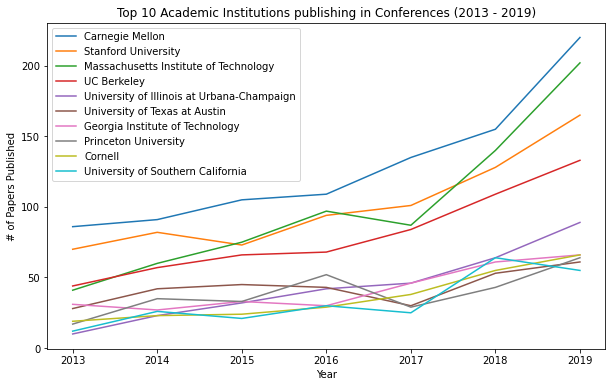

In [54]:
keys = final_filter2.keys()
values = final_filter2.values()
final_values = [yearly for (summed, yearly) in values]
fig = plt.figure(figsize=(10,6))
top_keys = list(keys)[:10]
top_values = list(final_values)[:10]
for i in range(len(top_values)):
    plt.plot(years_analyzed, top_values[i], label=top_keys[i])
plt.title('Top 10 Academic Institutions publishing in Conferences (2013 - 2019)')
plt.ylabel('# of Papers Published')
plt.xlabel('Year')
plt.legend()
plt.show()

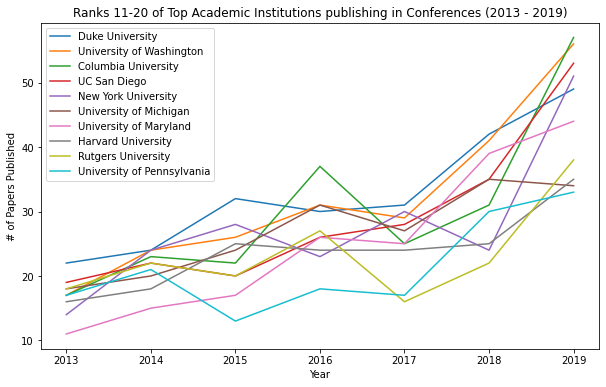

In [56]:
fig = plt.figure(figsize=(10,6))
top_keys = list(keys)[10:20]
top_values = list(final_values)[10:20]
for i in range(len(top_values)):
    plt.plot(years_analyzed, top_values[i], label=top_keys[i])
plt.title('Ranks 11-20 of Top Academic Institutions publishing in Conferences (2013 - 2019)')
plt.ylabel('# of Papers Published')
plt.xlabel('Year')
plt.legend()
plt.show()

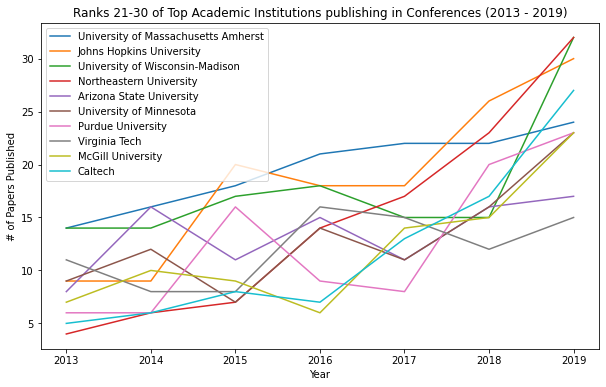

In [58]:
fig = plt.figure(figsize=(10,6))
top_keys = list(keys)[20:30]
top_values = list(final_values)[20:30]
for i in range(len(top_values)):
    plt.plot(years_analyzed, top_values[i], label=top_keys[i])
plt.title('Ranks 21-30 of Top Academic Institutions publishing in Conferences (2013 - 2019)')
plt.ylabel('# of Papers Published')
plt.xlabel('Year')
plt.legend()
plt.show()

In [60]:
inst_2019 = {}
for entry in final_filter2:
    inst_2019[entry] = final_filter2[entry][1][-1]

inst_2019 = {k: v for k, v in sorted(inst_2019.items(), key=lambda item: item[1], reverse=True)}

print(inst_2019)    

{'Carnegie Mellon': 220, 'Massachusetts Institute of Technology': 202, 'Stanford University': 165, 'UC Berkeley': 133, 'University of Illinois at Urbana-Champaign': 89, 'Georgia Institute of Technology': 66, 'Cornell': 66, 'Princeton University': 64, 'University of Texas at Austin': 61, 'Columbia University': 57, 'University of Washington': 56, 'University of Southern California': 55, 'UC San Diego': 53, 'New York University': 51, 'Duke University': 49, 'University of Maryland': 44, 'Rutgers University': 38, 'Harvard University': 35, 'University of Michigan': 34, 'University of Pennsylvania': 33, 'University of Wisconsin-Madison': 32, 'Northeastern University': 32, 'Johns Hopkins University': 30, 'Caltech': 27, 'University of Massachusetts Amherst': 24, 'Rice University': 24, 'University of Minnesota': 23, 'Purdue University': 23, 'McGill University': 23, 'University of Chicago': 21, 'UC Merced': 20, 'Yale University': 20, 'Northwestern University': 18, 'University of Pittsburgh': 18, 

In [61]:
df_2019 = pd.DataFrame(data=inst_2019, index=['Count (2019)'])

df_2019 = (df_2019.T)
df_2019.to_csv('/Users/jmak/Documents/A Schmidt Futures/project-dewey/Dewey2/output/2019_insts.csv')

In [28]:
authors = list(us_papers.authors_string)
authors_set = set()
for authors_str in authors:
    if isinstance(authors_str, str):
        authors_sep = authors_str.strip()
        authors_sep = authors_str.split(',')
        for sep in authors_sep:
            authors_set.add(sep)
print(list(authors_set)[0:5])

['Xin Guo', 'Junsik Kim', 'Kezhen Chen', 'Jason Weston', 'Maurice Weiler']


In [38]:
final_authors_list = list(authors_set)
us_papers[us_papers['authors_string'].str.contains(final_authors_list[0], na=False)]

,Unnamed: 0,year,title,authors_string,Countries,Institution,Institution Type,OpenSource
3686,7821,2013,Robust Object Co-detection,"Xin Guo, Dong Liu, Brendan Jou, Mojun Zhu, Ann...",US,UC Berkeley,Academia,NotOpenSource
6967,15448,2019,Learning Mean-Field Games,"Xin Guo, Anran Hu, Renyuan Xu, Junzi Zhang",US,"Stanford University, UC Berkeley",Academia,NotOpenSource


In [34]:
us_papers['authors_list'] = us_papers['authors_string'].str.strip('()').str.split(',')

In [43]:
us_papers = us_papers.dropna()
authors_series = pd.Series([item for sublist in us_papers.authors_list for item in sublist]).value_counts()
print(authors_series.to_string())
# authors_series[0:200].to_csv('/Users/jmak/Documents/A Schmidt Futures/project-dewey/Dewey2/output/200_authors.csv')

 Lawrence Carin                                                                                                  66
 Sergey Levine                                                                                                   63
 Ming-Hsuan Yang                                                                                                 49
 Pieter Abbeel                                                                                                   47
 Heng Huang                                                                                                      45
 Honglak Lee                                                                                                     43
 Stefano Ermon                                                                                                   42
 Le Song                                                                                                         42
 Yoshua Bengio                                                          

** APPENDIX **

In [ ]:
filtered_institutions = {'Carnegie Mellon': (1366, [125, 136, 150, 167, 209, 238, 341]), 'Stanford University': (1116, [104, 127, 114, 148, 164, 205, 254]), 'Massachusetts Institute of Technology': (1090, [62, 93, 109, 148, 138, 220, 320]), 'UC Berkeley': (805, [62, 81, 98, 99, 125, 154, 186]), 'University of Illinois at Urbana-Champaign': (491, [17, 40, 50, 69, 70, 102, 143]), 'Georgia Institute of Technology': (414, [38, 39, 46, 42, 63, 84, 102]), 'Cornell': (411, [32, 41, 39, 50, 63, 86, 100]), 'University of Texas at Austin': (354, [37, 47, 50, 48, 34, 64, 74]), 'New York University': (343, [25, 42, 47, 38, 53, 43, 95]), 'Princeton University': (340, [21, 42, 40, 65, 38, 53, 81]), 'Columbia University': (324, [25, 37, 36, 57, 41, 46, 82]), 'University of Michigan': (301, [28, 26, 34, 48, 46, 60, 59]), 'Duke University': (299, [28, 29, 40, 38, 40, 57, 67]), 'University of Washington': (277, [22, 30, 31, 37, 37, 48, 72]), 'University of Maryland': (262, [17, 23, 28, 37, 36, 56, 65]), 'UC San Diego': (254, [24, 26, 26, 33, 35, 44, 66]), 'University of Southern California': (254, [12, 29, 22, 31, 27, 69, 64]), 'Rutgers University': (199, [21, 28, 23, 30, 17, 27, 53]), 'University of Pennsylvania': (193, [20, 25, 17, 24, 25, 38, 44]), 'Harvard University': (186, [19, 20, 27, 26, 26, 30, 38]), 'University of Massachusetts Amherst': (183, [19, 20, 26, 30, 30, 28, 30]), 'Johns Hopkins University': (151, [10, 10, 22, 23, 20, 30, 36]), 'Virginia Tech': (147, [19, 13, 14, 28, 28, 20, 25]), 'University of Wisconsin-Madison': (141, [15, 16, 18, 22, 15, 15, 40]), 'Caltech': (137, [9, 10, 14, 10, 24, 27, 43]), 'McGill University': (124, [7, 13, 10, 8, 25, 24, 37]), 'Michigan State University': (117, [21, 23, 17, 14, 17, 11, 14]), 'UC Irvine': (115, [14, 21, 19, 15, 9, 15, 22]), 'Purdue University': (113, [8, 7, 20, 14, 11, 25, 28]), 'University of Minnesota': (105, [11, 13, 8, 15, 12, 19, 27]), 'Arizona State University': (105, [9, 17, 14, 16, 12, 19, 18]), 'Northeastern University': (104, [4, 6, 7, 14, 17, 23, 33]), 'Northwestern University': (101, [9, 7, 9, 9, 17, 18, 32]), 'University of Rochester': (94, [8, 7, 12, 19, 11, 17, 20]), 'Boston University': (92, [4, 6, 7, 10, 12, 21, 32]), 'University of North Carolina': (87, [5, 6, 10, 11, 9, 14, 32]), 'Pennsylvania State University': (86, [7, 3, 9, 15, 9, 21, 22]), 'University of Pittsburgh': (85, [2, 1, 6, 7, 19, 27, 23]), 'Oregon State University': (84, [13, 13, 9, 10, 12, 13, 14]), 'Brown University': (80, [15, 10, 6, 10, 8, 14, 17]), 'University of Central Florida': (80, [5, 6, 8, 8, 11, 17, 25]), 'University of Chicago': (78, [6, 6, 10, 12, 9, 8, 27]), 'UC Davis': (76, [4, 2, 2, 13, 20, 15, 20]), 'Yale University': (75, [1, 3, 9, 8, 13, 11, 30]), 'Indiana University': (74, [4, 8, 9, 13, 8, 14, 18]), 'UC Merced': (73, [6, 7, 7, 8, 8, 17, 20]), 'University of Texas at Arlington': (71, [9, 10, 9, 11, 17, 9, 6]), 'Ohio State University': (69, [11, 3, 3, 9, 10, 6, 27]), 'Washington University in St. Louis': (66, [4, 8, 11, 5, 6, 12, 20]), 'Rice University': (65, [4, 2, 1, 9, 4, 16, 29]), 'University of Illinois at Chicago': (60, [3, 6, 10, 11, 8, 8, 14]), 'Rensselaer Polytechnic Institute': (57, [6, 7, 6, 9, 5, 10, 14]), 'University of Florida': (55, [5, 4, 4, 2, 9, 12, 19]), 'University of Iowa': (55, [2, 7, 5, 11, 12, 9, 9]), 'Stony Brook University': (53, [2, 2, 7, 9, 6, 10, 17]), 'Dartmouth College': (51, [4, 6, 8, 8, 9, 8, 8]), 'University of Virginia': (50, [0, 0, 3, 7, 11, 12, 17]), 'University of Colorado': (48, [2, 7, 7, 5, 2, 14, 11]), 'University of North Carolina at Chapel Hill': (43, [2, 3, 6, 3, 5, 8, 16]), 'SUNY Buffalo': (43, [1, 6, 5, 4, 6, 7, 14]), 'Temple University': (42, [5, 10, 0, 5, 6, 8, 8]), 'UT Dallas': (42, [2, 5, 11, 9, 4, 6, 5]), 'University of Utah': (33, [3, 2, 3, 6, 2, 8, 9]), 'UC Santa Cruz': (33, [1, 5, 7, 3, 4, 3, 10]), 'University at Buffalo': (31, [2, 3, 1, 5, 5, 3, 12]), 'UC Santa Barbara': (31, [0, 3, 2, 2, 1, 7, 16]), 'Tufts University': (26, [3, 4, 3, 3, 6, 4, 3]), 'University of Connecticut': (25, [0, 6, 4, 1, 2, 2, 10]), 'Rochester Institute of Technology': (25, [0, 4, 1, 0, 2, 8, 10]), 'Iowa State University': (24, [2, 3, 0, 2, 2, 8, 7]), 'University of Kentucky': (23, [4, 5, 3, 5, 1, 3, 2]), 'Baylor College of Medicine': (20, [3, 1, 2, 3, 2, 4, 5]), 'Washington State University': (20, [0, 6, 2, 0, 3, 5, 4]), 'University of Notre Dame': (20, [0, 0, 2, 1, 1, 4, 12]), 'University of New Hampshire': (19, [4, 1, 2, 2, 2, 3, 5]), 'University of Georgia': (19, [0, 3, 1, 5, 3, 4, 3]), 'Vanderbilt': (19, [0, 1, 5, 9, 3, 1, 0]), 'City University of New York': (18, [1, 1, 5, 1, 3, 3, 4]), 'North Carolina State University': (17, [2, 4, 5, 0, 4, 1, 1]), 'University of Delaware': (17, [1, 2, 2, 2, 2, 3, 5]), 'UC Riverside': (17, [1, 1, 0, 1, 4, 5, 5]), 'University of North Texas': (17, [0, 3, 1, 6, 1, 6, 0]), 'George Mason University': (17, [0, 0, 0, 0, 4, 3, 10]), 'New Mexico State University': (16, [0, 4, 4, 5, 1, 0, 2]), 'University of Oregon': (15, [1, 2, 0, 3, 0, 2, 7]), 'University of Arizona': (15, [0, 0, 4, 3, 3, 1, 4]), 'University at Albany': (14, [1, 0, 0, 3, 3, 2, 5]), 'Southern Illinois University': (13, [1, 2, 2, 2, 2, 3, 1]), 'University of Miami': (13, [0, 5, 0, 1, 3, 3, 1]), 'Syracuse University': (13, [0, 0, 1, 3, 0, 4, 5]), 'University of Denver': (12, [0, 3, 0, 3, 3, 1, 2]), 'Texas Tech University': (12, [0, 1, 2, 6, 2, 0, 1]), 'University of New Mexico': (11, [2, 2, 1, 5, 0, 1, 0]), 'University of Houston': (11, [0, 1, 2, 1, 2, 3, 2]), 'Georgia State University': (11, [0, 0, 0, 4, 3, 4, 0]), 'Kansas State University': (11, [0, 0, 0, 0, 1, 6, 4]), 'Santa Clara University': (10, [0, 1, 5, 0, 2, 0, 2]), 'West Virginia University': (10, [0, 0, 0, 4, 1, 2, 3]), 'Harvey Mudd College': (9, [0, 0, 4, 2, 2, 1, 0]), 'University of Missouri': (9, [0, 0, 0, 0, 2, 4, 3]), 'Case Western Reserve University': (8, [4, 1, 0, 2, 0, 1, 0]), 'Wright State University': (8, [1, 0, 1, 3, 1, 1, 1]), 'Swarthmore College': (8, [0, 0, 0, 0, 0, 5, 3]), 'University of Central Arkansas': (7, [3, 0, 0, 0, 1, 0, 3]), 'Illinois Institute of Technology': (7, [1, 1, 2, 1, 1, 0, 1]), 'Emory University': (7, [0, 0, 0, 2, 0, 4, 1]), 'Brandeis University': (7, [0, 0, 0, 0, 1, 2, 4]), 'Loyola Marymount University': (6, [3, 0, 0, 1, 1, 0, 1]), 'University of Nebraska-Lincoln': (6, [2, 0, 2, 0, 1, 1, 0]), 'Georgetown University': (6, [2, 0, 1, 0, 0, 2, 1]), 'Michigan Technological University': (6, [1, 0, 1, 1, 1, 2, 0]), 'Florida International University': (6, [0, 0, 0, 0, 0, 1, 5]), 'University of Vermont': (5, [5, 0, 0, 0, 0, 0, 0]), 'Louisiana State University': (5, [0, 2, 2, 0, 0, 0, 1]), 'Florida State University': (5, [0, 2, 0, 0, 0, 2, 1]), 'Mississippi State University': (5, [0, 0, 1, 1, 0, 0, 3]), 'The University of Texas at El Paso': (5, [0, 0, 0, 5, 0, 0, 0]), 'The University of Tennessee': (4, [0, 0, 0, 1, 1, 1, 1]), 'University of South Carolina': (4, [0, 0, 0, 1, 0, 3, 0]), 'Auburn University': (4, [0, 0, 0, 0, 0, 2, 2]), 'Colorado State University': (3, [2, 0, 0, 0, 1, 0, 0]), 'Brigham Young University': (3, [0, 0, 1, 1, 0, 1, 0]), 'New Jersey Institute of Technology': (3, [0, 0, 0, 1, 0, 1, 1]), 'Cisco Systems': (3, [0, 0, 0, 0, 1, 0, 2]), 'Bryn Mawr College': (2, [2, 0, 0, 0, 0, 0, 0]), 'Wake Forest University': (2, [1, 0, 1, 0, 0, 0, 0]), 'UC San Francisco': (2, [0, 1, 0, 1, 0, 0, 0]), 'DePauw University': (2, [0, 0, 0, 1, 0, 0, 1]), 'UC Los Angeles': (2, [0, 0, 0, 0, 1, 1, 0]), 'The University of Southern Mississippi': (1, [1, 0, 0, 0, 0, 0, 0]), 'Catholic University of America': (1, [1, 0, 0, 0, 0, 0, 0]), 'University of Lousiana at Lafayette': (1, [1, 0, 0, 0, 0, 0, 0]), 'University of Hartford': (1, [0, 1, 0, 0, 0, 0, 0]), 'Oregon Health & Science University': (1, [0, 1, 0, 0, 0, 0, 0]), 'University of Masschusetts Lowell': (1, [0, 0, 1, 0, 0, 0, 0]), 'University of Akron': (1, [0, 0, 1, 0, 0, 0, 0]), 'University of Louisville': (1, [0, 0, 0, 1, 0, 0, 0]), 'University of Kansas': (1, [0, 0, 0, 0, 1, 0, 0]), 'Franklin. W. Olin College of Engineering': (1, [0, 0, 0, 0, 1, 0, 0]), 'College of William & Mary': (1, [0, 0, 0, 0, 1, 0, 0]), 'Boise State University': (1, [0, 0, 0, 0, 0, 1, 0]), 'North Carolina A&T State University': (1, [0, 0, 0, 0, 0, 1, 0])}

In [4]:
institutions_2019 = {'Carnegie Mellon': (299, [299]), 'Stanford University': (254, [254]), 'Massachusetts Institute of Technology': (242, [242]), 'UC Berkeley': (211, [211]), 'University of Illinois at Urbana-Champaign': (144, [144]), 'Georgia Institute of Technology': (107, [107]), 'Cornell': (105, [105]), 'University of Southern California': (92, [92]), 'Princeton University': (90, [90]), 'UC San Diego': (87, [87]), 'Columbia University': (80, [80]), 'University of Texas at Austin': (77, [77]), 'New York University': (75, [75]), 'Duke University': (75, [75]), 'University of Washington': (69, [69]), 'Rutgers University': (58, [58]), 'University of Maryland': (50, [50]), 'Northeastern University': (50, [50]), 'University of Michigan': (49, [49]), 'University of Wisconsin-Madison': (49, [49]), 'Johns Hopkins University': (40, [40]), 'Harvard University': (39, [39]), 'University of Minnesota': (39, [39]), 'University of Pennsylvania': (35, [35]), 'Purdue University': (35, [35]), 'Northwestern University': (33, [33]), 'Boston University': (32, [32]), 'University of North Carolina': (31, [31]), 'McGill University': (31, [31]), 'UC Merced': (30, [30]), 'University of Massachusetts Amherst': (29, [29]), 'Rice University': (29, [29]), 'University of Chicago': (28, [28]), 'Arizona State University': (27, [27]), 'Caltech': (27, [27]), 'University of Central Florida': (26, [26]), 'UC Davis': (25, [25]), 'Yale University': (24, [24]), 'University of North Carolina at Chapel Hill': (24, [24]), 'University of Rochester': (22, [22]), 'Ohio State University': (21, [21]), 'Oregon State University': (21, [21]), 'UC Santa Barbara': (20, [20]), 'University of Illinois at Chicago': (20, [20]), 'University of Florida': (19, [19]), 'UC Irvine': (19, [19]), 'University of Pittsburgh': (19, [19]), 'University of Virginia': (19, [19]), 'Rensselaer Polytechnic Institute': (18, [18]), 'Pennsylvania State University': (18, [18]), 'Washington University in St. Louis': (18, [18]), 'Virginia Tech': (18, [18]), 'Michigan State University': (17, [17]), 'SUNY Buffalo': (16, [16]), 'Brown University': (16, [16]), 'University of Notre Dame': (15, [15]), 'Stony Brook University': (12, [12]), 'University at Buffalo': (12, [12]), 'Indiana University': (12, [12]), 'University of Iowa': (10, [10]), 'Rochester Institute of Technology': (10, [10]), 'University of Colorado': (10, [10]), 'University of Connecticut': (9, [9]), 'Dartmouth College': (9, [9]), 'University of Oregon': (9, [9]), 'Temple University': (8, [8]), 'University of Utah': (8, [8]), 'UC Santa Cruz': (8, [8]), 'Iowa State University': (7, [7]), 'University at Albany': (7, [7]), 'UC Riverside': (6, [6]), 'Brandeis University': (6, [6]), 'George Mason University': (6, [6]), 'University of New Hampshire': (5, [5]), 'University of Delaware': (5, [5]), 'City University of New York': (5, [5]), 'Baylor College of Medicine': (5, [5]), 'UT Dallas': (5, [5]), 'Tufts University': (5, [5]), 'University of Texas at Arlington': (4, [4]), 'Florida International University': (4, [4]), 'West Virginia University': (3, [3]), 'University of Arizona': (3, [3]), 'University of Georgia': (3, [3]), 'Kansas State University': (3, [3]), 'Cisco Systems': (3, [3]), 'Washington State University': (3, [3]), 'Swarthmore College': (3, [3]), 'University of Central Arkansas': (3, [3]), 'Mississippi State University': (3, [3]), 'Syracuse University': (3, [3]), 'Auburn University': (2, [2]), 'University of Missouri': (2, [2]), 'University of Houston': (2, [2]), 'New Mexico State University': (2, [2]), 'University of Kentucky': (2, [2]), 'University of Denver': (1, [1]), 'Wright State University': (1, [1]), 'Florida State University': (1, [1]), 'Illinois Institute of Technology': (1, [1]), 'Georgetown University': (1, [1]), 'Southern Illinois University': (1, [1]), 'Texas Tech University': (1, [1]), 'Loyola Marymount University': (1, [1]), 'New Jersey Institute of Technology': (1, [1]), 'DePauw University': (1, [1]), 'North Carolina State University': (1, [1]), 'The University of Tennessee': (1, [1]), 'University of Miami': (1, [1]), 'Louisiana State University': (1, [1]), 'Santa Clara University': (1, [1]), 'Emory University': (1, [1])}

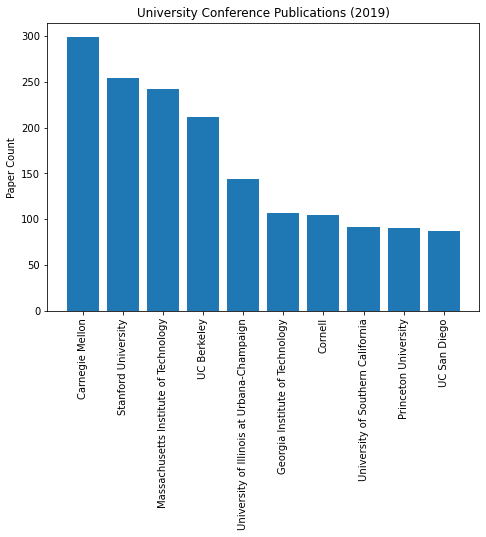

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
keys = institutions_2019.keys()
values = institutions_2019.values()
final_values = []
for value in list(values):
    final_values.append(value[0])
top_keys = list(keys)[:10]
top_values = list(final_values)[:10]
plt.bar(top_keys, top_values)
plt.xticks(rotation=90)
plt.ylabel("Paper Count")
plt.title("University Conference Publications (2019)")
plt.show()

In [18]:
def getColumnCountsSplit(df, colName, year=-1):
    col_count = defaultdict(int)
    for row in df.iterrows():
        c = row[1][colName]
        if isinstance(c, str):
            items = c.split(',')
            if (year != -1 and row[1]['year'] == year) or year == -1:
                for i in items:
                    i = i.strip()
                    col_count[i] += 1
    col_count = {k:v for k,v in sorted(col_count.items(), key=lambda item: item[1],reverse=True)}
    return col_count

In [47]:
yearly_counts = {}
for i in range(2013, 2020):
    yearly_dict = getColumnCountsSplit(us_papers, 'Institution', i)
    for inst in yearly_dict:
        if inst not in yearly_dict:
            yearly_counts[inst] = [getColumnCountsSplit(us_papers, 'Institution', i)[inst]]
        else:
            yearly_counts[inst].append(getColumnCountsSplit(us_papers, 'Institution', i)[inst])
    
print(yearly_counts)

KeyError: 'Microsoft'

In [2]:
# institutions = {'Massachusetts Institute of Technology': (1160, [66, 98, 116, 162, 143, 237, 338]),
#                 'Stanford University': (1093, [101, 118, 114, 148, 156, 204, 252]),
#                 'Carnegie Mellon': (983, [92, 99, 115, 119, 146, 164, 248]), 
#                 'UC Berkeley': (675, [54, 69, 77, 82, 97, 130, 166]),
#                 'Georgia Institute of Technology': (466, [44, 43, 50, 46, 75, 97, 111]),
#                 'University of Texas at Austin': (413, [35, 55, 58, 59, 43, 77, 86]),
#                 'New York University': (373, [27, 48, 49, 45, 58, 47, 99]),
#                 'Columbia University': (360, [27, 40, 38, 62, 44, 54, 95]),
#                 'Duke University': (359, [31, 36, 47, 45, 46, 73, 81]),
#                 'University of Illinois at Urbana-Champaign': (359, [11, 28, 38, 49, 49, 78, 106]),
#                 'University of California': (358, [22, 20, 30, 39, 44, 77, 126]),
#                 'Cornell': (343, [22, 31, 33, 39, 54, 73, 91]),
#                 'University of Washington': (340, [29, 33, 32, 47, 46, 63, 90]),
#                 'UC San Diego': (332, [30, 35, 34, 41, 47, 58, 87]),
#                 'Princeton University': (327, [22, 43, 35, 59, 37, 53, 78]),
#                 'University of Southern California': (309, [13, 33, 27, 37, 34, 89, 76]),
#                 'University of Michigan': (304, [28, 27, 34, 48, 48, 59, 60]),
#                 'University of Maryland': (245, [15, 21, 25, 36, 36, 49, 63]),
#                 'Harvard University': (239, [23, 25, 35, 37, 32, 38, 49]),
#                 'Los Angeles': (234, [16, 15, 22, 28, 28, 46, 79]),
#                 'Rutgers University': (216, [24, 33, 25, 34, 19, 28, 53]),
#                 'University of Massachusetts Amherst': (197, [23, 22, 26, 30, 31, 33, 32]),
#                 'Johns Hopkins University': (197, [16, 14, 29, 29, 25, 39, 45]),
#                 'University of Wisconsin-Madison': (178, [20, 20, 25, 26, 21, 20, 46]),
#                 'University of Pennsylvania': (178, [19, 26, 16, 20, 21, 34, 42]),
#                 'University of Cambridge': (177, [5, 15, 14, 28, 29, 28, 58]),
#                 'Virginia Tech': (139, [18, 14, 14, 27, 25, 19, 22]),
#                 'University of Minnesota': (139, [15, 16, 11, 18, 16, 23, 40]),
#                 'UC Merced': (131, [11, 12, 12, 14, 16, 31, 35]),
#                 'Northeastern University': (131, [5, 8, 8, 16, 19, 31, 44]),
#                 'Purdue University': (128, [10, 9, 22, 16, 12, 27, 32]),
#                 'Caltech': (117, [8, 8, 12, 10, 17, 23, 39]),
#                 'University of Rochester': (115, [7, 8, 14, 25, 14, 22, 25]),
#                 'Northwestern University': (109, [8, 9, 9, 9, 19, 22, 33]),
#                 'University of Illinois at Chicago': (105, [6, 12, 16, 19, 14, 16, 22]),
#                 'Arizona State University': (103, [9, 18, 14, 18, 11, 16, 17]),
#                 'Rice University': (93, [7, 3, 2, 16, 4, 20, 41]),
#                 'Boston University': (89, [4, 6, 7, 10, 12, 21, 29]),
#                 'University of North Carolina': (88, [5, 6, 10, 11, 9, 14, 33]),
#                 'Michigan State University': (87, [15, 15, 13, 10, 13, 8, 13]),
#                 'Oregon State University': (86, [15, 13, 8, 10, 12, 12, 16]),
#                 'UC Irvine': (84, [9, 14, 13, 11, 8, 13, 16]),
#                 'Indiana University': (84, [4, 9, 10, 15, 9, 17, 20]),
#                 'Pennsylvania State University': (83, [6, 3, 8, 14, 9, 22, 21]),
#                 'Brown University': (81, [17, 12, 6, 9, 8, 13, 16]),
#                 'University of Chicago': (79, [5, 4, 11, 10, 9, 8, 32]),
#                 'Washington University in St. Louis': (76, [5, 10, 16, 5, 5, 13, 22]),
#                 'University of Pittsburgh': (75, [3, 1, 5, 6, 16, 21, 23]),
#                 'Rensselaer Polytechnic Institute': (74, [8, 8, 9, 10, 8, 12, 19]),
#                 'UC Davis': (74, [4, 3, 3, 12, 20, 15, 17]),
#                 'Yale University': (73, [1, 3, 8, 7, 12, 13, 29]),
#                 'University of Texas at Arlington': (72, [7, 11, 8, 11, 16, 12, 7]),
#                 'University of Central Florida': (72, [4, 5, 7, 8, 10, 15, 23]),
#                 'Pitt': (63, [2, 1, 5, 6, 12, 19, 18]),
#                 'Ohio State University': (62, [11, 2, 3, 9, 7, 7, 23]),
#                 'SUNY Buffalo': (59, [1, 8, 6, 6, 9, 11, 18]),
#                 'Texas A&M University': (54, [2, 1, 4, 7, 0, 20, 20]),
#                 'University of Colorado': (53, [1, 7, 7, 5, 4, 15, 14]),
#                 'Stony Brook University': (52, [2, 2, 7, 9, 7, 9, 16]),
#                 'University of Florida': (46, [4, 3, 2, 1, 8, 9, 19]),
#                 'University of Virginia': (46, [0, 0, 4, 7, 9, 10, 16]),
#                 'UT Dallas': (43, [2, 5, 11, 9, 4, 7, 5]),
#                 'University of Utah': (41, [3, 2, 4, 7, 3, 10, 12]),
#                 'UC Santa Barbara': (41, [0, 3, 3, 3, 2, 10, 20]),
#                 'Temple University': (38, [5, 8, 0, 4, 6, 7, 8]),
#                 'Dartmouth College': (38, [2, 4, 7, 7, 7, 5, 6]),
#                 'University of Iowa': (38, [1, 4, 4, 7, 8, 7, 7]),
#                 'Tufts University': (37, [4, 6, 5, 4, 8, 6, 4]),
#                 'University of North Carolina at Chapel Hill': (37, [2, 3, 5, 3, 4, 7, 13]),
#                 'U.S. Army Research Laboratory': (35, [2, 2, 2, 2, 3, 5, 19]),
#                 'Baylor College of Medicine': (34, [6, 2, 4, 4, 4, 7, 7]),
#                 'University at Buffalo': (33, [2, 4, 1, 4, 4, 4, 14]),
#                 'Northwestern Polytechnical University': (29, [1, 2, 4, 2, 10, 4, 6]),
#                 'UC Santa Cruz': (28, [1, 3, 5, 3, 4, 3, 9]),
#                 'University of Delaware': (25, [1, 3, 3, 3, 3, 4, 8]),
#                 'University of Connecticut': (25, [0, 5, 4, 1, 1, 4, 10]),
#                 'University of Kentucky': (23, [4, 5, 3, 6, 1, 2, 2]),
#                 'Rochester Institute of Technology': (23, [0, 2, 1, 0, 1, 8, 11]),
#                 'City University of New York': (21, [2, 2, 5, 1, 3, 3, 5]),
#                 'Vanderbilt': (21, [0, 1, 6, 9, 4, 1, 0]),
#                 'Iowa State University': (20, [2, 3, 0, 2, 2, 7, 4]),
#                 'North Carolina State University': (19, [2, 5, 4, 0, 5, 1, 2]),
#                 'Washington State University': (19, [0, 5, 2, 0, 3, 5, 4]),
#                 'University of Georgia': (19, [0, 4, 1, 4, 2, 4, 4]),
#                 'University of Arizona': (19, [0, 0, 4, 3, 4, 2, 6]),
#                 'University of Notre Dame': (19, [0, 0, 2, 1, 1, 4, 11]),
#                 'George Mason University': (18, [0, 0, 0, 0, 4, 3, 11]),
#                 'University of Oregon': (17, [1, 2, 0, 4, 0, 2, 8]),
#                 'UC Riverside': (17, [1, 1, 0, 1, 4, 5, 5]),
#                 'University at Albany': (17, [1, 0, 0, 3, 3, 3, 7]),
#                 'University of Miami': (17, [0, 5, 0, 1, 4, 5, 2]),
#                 'University of North Texas': (17, [0, 3, 1, 5, 1, 7, 0]),
#                 'University of New Hampshire': (16, [4, 1, 2, 1, 1, 3, 4]),
#                 'New Mexico State University': (16, [0, 4, 4, 5, 1, 0, 2]),
#                 'West Virginia University': (14, [0, 0, 0, 8, 1, 2, 3]),
#                 'Southern Illinois University': (13, [1, 2, 2, 2, 2, 3, 1]),
#                 'University of New Mexico': (11, [2, 2, 2, 4, 0, 1, 0]),
#                 'University of Denver': (11, [0, 3, 0, 3, 2, 1, 2]),
#                 'Kansas State University': (11, [0, 0, 0, 0, 1, 5, 5]),
#                 'Illinois Institute of Technology': (10, [1, 1, 4, 1, 2, 0, 1]),
#                 'University of Houston': (10, [0, 1, 2, 1, 2, 2, 2]),
#                 'Emory University': (10, [0, 0, 0, 3, 0, 6, 1]),
#                 'Wright State University': (9, [1, 0, 1, 3, 1, 2, 1]),
#                 'Harvey Mudd College': (9, [0, 0, 4, 2, 2, 1, 0]), 
#                 'Case Western Reserve University': (8, [4, 1, 0, 2, 0, 1, 0]),
#                 'University of Central Arkansas': (8, [4, 0, 0, 0, 1, 0, 3]),
#                 'Syracuse University': (8, [0, 0, 1, 2, 0, 2, 3]),
#                 'Georgia State University': (8, [0, 0, 0, 2, 3, 3, 0]),
#                 'Michigan Technological University': (7, [1, 0, 1, 1, 2, 2, 0]),
#                 'Santa Clara University': (7, [0, 1, 3, 0, 2, 0, 1]),
#                 'Texas Tech University': (7, [0, 1, 1, 3, 1, 0, 1]),
#                 'The University of Texas at El Paso': (7, [0, 0, 0, 7, 0, 0, 0]),
#                 'University of South Carolina': (7, [0, 0, 0, 1, 0, 6, 0]),
#                 'University of Missouri': (7, [0, 0, 0, 0, 1, 3, 3]),
#                 'Brandeis University': (7, [0, 0, 0, 0, 1, 2, 4]),
#                 'University of Nebraska-Lincoln': (6, [2, 0, 2, 0, 1, 1, 0]),
#                 'Georgetown University': (6, [2, 0, 1, 0, 0, 2, 1]),
#                 'Loyola Marymount University': (6, [2, 0, 0, 2, 1, 0, 1]),
#                 'Swarthmore College': (6, [0, 0, 0, 0, 0, 3, 3]),
#                 'Florida International University': (6, [0, 0, 0, 0, 0, 2, 4]),
#                 'Mississippi State University': (5, [0, 0, 1, 1, 0, 0, 3]),
#                 'Ecole Polytechnique de Montreal': (5, [0, 0, 0, 1, 3, 1, 0]), 'University of Tennessee': (5, [0, 0, 0, 1, 1, 1, 2]), 'TU Darmstadt': (5, [0, 0, 0, 1, 1, 1, 2]), 'University of Lille': (5, [0, 0, 0, 0, 3, 2, 0]), 'Universite Laval': (5, [0, 0, 0, 0, 2, 1, 2]), 'Cisco Systems': (5, [0, 0, 0, 0, 2, 0, 3]), 'KTH Royal Institute of Technology': (5, [0, 0, 0, 0, 2, 0, 3]), 'University of Salzburg': (5, [0, 0, 0, 0, 1, 2, 2]), 'Citadel': (5, [0, 0, 0, 0, 0, 3, 2]), 'IDSIA': (5, [0, 0, 0, 0, 0, 3, 2]), 'Bosch GmbH': (5, [0, 0, 0, 0, 0, 2, 3]), 'Inception Institute of Artiﬁcial Intelligence': (5, [0, 0, 0, 0, 0, 2, 3]), 'NASA': (4, [1, 0, 1, 1, 0, 1, 0]), 'Louisiana State University': (4, [0, 1, 2, 0, 0, 0, 1]), 'Northrop Grumman Corp.': (4, [0, 1, 1, 2, 0, 0, 0]), 'Kyushu University': (4, [0, 1, 0, 2, 0, 1, 0]), "King's College London": (4, [0, 1, 0, 1, 0, 1, 1]), 'Deakin University': (4, [0, 1, 0, 0, 1, 1, 1]), 'TU Graz': (4, [0, 1, 0, 0, 0, 2, 1]), 'University of Warsaw': (4, [0, 1, 0, 0, 0, 1, 2]), 'Philips': (4, [0, 0, 2, 1, 1, 0, 0]), 'Southeast University': (4, [0, 0, 2, 1, 0, 0, 1]), 'University of Bern': (4, [0, 0, 1, 0, 1, 1, 1]), 'The University of Tennessee': (4, [0, 0, 0, 1, 1, 1, 1]), 'United States Naval Academy': (4, [0, 0, 0, 1, 0, 2, 1]), 'Auburn University': (4, [0, 0, 0, 0, 0, 2, 2]), 'China University of Geosciences': (4, [0, 0, 0, 0, 0, 0, 4]), 'University of Vermont': (3, [3, 0, 0, 0, 0, 0, 0]), 'University of Sheffield': (3, [2, 0, 0, 0, 1, 0, 0]), 'Colorado State University': (3, [2, 0, 0, 0, 1, 0, 0]), 'University of London': (3, [2, 0, 0, 0, 0, 0, 1]), 'Wake Forest University': (3, [1, 0, 2, 0, 0, 0, 0]), 'Jilin University': (3, [1, 0, 1, 0, 0, 0, 1]), 'Nagoya Institute of Technology': (3, [1, 0, 0, 1, 0, 0, 1]), 'Universidad de la Rep´ublica': (3, [1, 0, 0, 0, 0, 1, 1]), 'Uruguay': (3, [1, 0, 0, 0, 0, 1, 1]), 'Nuance Communications': (3, [0, 2, 0, 0, 0, 1, 0]), 'University of Helsinki': (3, [0, 1, 1, 0, 1, 0, 0]), 'Centrum Wiskunde & Informatica': (3, [0, 1, 1, 0, 1, 0, 0]), 'Universit´e de Sherbrooke': (3, [0, 1, 1, 0, 1, 0, 0]), 'UC San Francisco': (3, [0, 1, 0, 2, 0, 0, 0]), 'Florida State University': (3, [0, 1, 0, 0, 0, 1, 1]), 'Idiap Research Institute': (3, [0, 0, 3, 0, 0, 0, 0]), 'University of Birmingham': (3, [0, 0, 2, 0, 0, 1, 0]), 'Jacobs University Bremen': (3, [0, 0, 2, 0, 0, 0, 1]), 'Athens University of Economics and Business': (3, [0, 0, 1, 2, 0, 0, 0]), 'University of Potsdam': (3, [0, 0, 1, 2, 0, 0, 0]), 'Brigham Young University': (3, [0, 0, 1, 1, 0, 1, 0]), 'University of Aberdeen': (3, [0, 0, 1, 1, 0, 0, 1]), 'University of Manchester': (3, [0, 0, 0, 1, 2, 0, 0]), 'London School of Economics': (3, [0, 0, 0, 1, 2, 0, 0]), 'New Jersey Institute of Technology': (3, [0, 0, 0, 1, 0, 1, 1]), 'University of Bristol': (3, [0, 0, 0, 1, 0, 1, 1]), 'Naval Research Laboratory': (3, [0, 0, 0, 0, 1, 2, 0]), 'Prowler.io': (3, [0, 0, 0, 0, 1, 1, 1]), 'Mayo Clinic': (3, [0, 0, 0, 0, 1, 1, 1]), 'Delft University of Technology': (3, [0, 0, 0, 0, 1, 1, 1]), 'ASAPP': (3, [0, 0, 0, 0, 1, 0, 2]), 'University of Oslo': (3, [0, 0, 0, 0, 1, 0, 2]), 'University of South Florida': (3, [0, 0, 0, 0, 0, 3, 0]), 'Institut de Physique Théorique': (3, [0, 0, 0, 0, 0, 1, 2]), 'Universite Paris-Saclay': (3, [0, 0, 0, 0, 0, 1, 2]), 'UW Madison': (3, [0, 0, 0, 0, 0, 0, 3]), 'Intel AI Lab': (3, [0, 0, 0, 0, 0, 0, 3]), 'Heriot-Watt University': (3, [0, 0, 0, 0, 0, 0, 3]), 'Universitat Pompeu Fabra': (3, [0, 0, 0, 0, 0, 0, 3]), 'Bryn Mawr College': (2, [2, 0, 0, 0, 0, 0, 0]), 'Cycorp': (2, [2, 0, 0, 0, 0, 0, 0]), 'Universit´e Paris-Est': (2, [1, 1, 0, 0, 0, 0, 0]), 'University of Oldenburg': (2, [1, 0, 0, 1, 0, 0, 0]), 'Lucent': (2, [0, 1, 1, 0, 0, 0, 0]), 'Institut Universitaire de France': (2, [0, 1, 0, 1, 0, 0, 0]), 'Leiden University': (2, [0, 1, 0, 0, 1, 0, 0]), 'University of York': (2, [0, 1, 0, 0, 1, 0, 0]), 'Lenovo': (2, [0, 1, 0, 0, 0, 1, 0]), 'Expedia': (2, [0, 0, 2, 0, 0, 0, 0]), 'Nara Institute of Science and Technology': (2, [0, 0, 1, 1, 0, 0, 0]), 'University of Paderborn': (2, [0, 0, 1, 0, 1, 0, 0]), 'Universit`a di Genova': (2, [0, 0, 1, 0, 1, 0, 0]), 'General Electric': (2, [0, 0, 1, 0, 0, 0, 1]), 'Radboud University': (2, [0, 0, 0, 1, 0, 1, 0]), 'Heidelberg University': (2, [0, 0, 0, 1, 0, 1, 0]), 'Fujian Key Laboratory of Sensing and Computing for Smart City': (2, [0, 0, 0, 1, 0, 1, 0]), 'DePauw University': (2, [0, 0, 0, 1, 0, 0, 1]), 'Institute of Statistical Mathematics': (2, [0, 0, 0, 1, 0, 0, 1]), 'Korea University': (2, [0, 0, 0, 0, 2, 0, 0]), 'University of Surrey': (2, [0, 0, 0, 0, 2, 0, 0]), 'IIIT Delhi': (2, [0, 0, 0, 0, 1, 1, 0]), 'Poznan University of Technology': (2, [0, 0, 0, 0, 1, 1, 0]), 'Cold Spring Harbor Lab': (2, [0, 0, 0, 0, 1, 1, 0]), 'UC Los Angeles': (2, [0, 0, 0, 0, 1, 1, 0]), 'Politecnico di Torino': (2, [0, 0, 0, 0, 1, 1, 0]), 'Qihoo 360': (2, [0, 0, 0, 0, 1, 1, 0]), 'Walmart Labs': (2, [0, 0, 0, 0, 1, 1, 0]), 'Universite de Lorraine': (2, [0, 0, 0, 0, 1, 0, 1]), 'American University of Beirut': (2, [0, 0, 0, 0, 1, 0, 1]), 'Tampa': (2, [0, 0, 0, 0, 0, 2, 0]), 'University of Bath': (2, [0, 0, 0, 0, 0, 2, 0]), 'NAVER': (2, [0, 0, 0, 0, 0, 1, 1]), 'Shenzhen Graduate School': (2, [0, 0, 0, 0, 0, 1, 1]), 'University of Florence': (2, [0, 0, 0, 0, 0, 1, 1]), 'McMaster University': (2, [0, 0, 0, 0, 0, 1, 1]), 'Newcastle University': (2, [0, 0, 0, 0, 0, 1, 1]), 'Airbnb': (2, [0, 0, 0, 0, 0, 1, 1]), 'ICREA': (2, [0, 0, 0, 0, 0, 0, 2]), 'Beijing Normal University': (2, [0, 0, 0, 0, 0, 0, 2]), 'Vienna University of Technology': (1, [1, 0, 0, 0, 0, 0, 0]), 'Catholic University of America': (1, [1, 0, 0, 0, 0, 0, 0]), 'Nikon Corporation': (1, [1, 0, 0, 0, 0, 0, 0]), 'Russian Academy of Sciences': (1, [1, 0, 0, 0, 0, 0, 0]), 'University of Mannheim': (1, [1, 0, 0, 0, 0, 0, 0]), 'Universite de Technologie de Compiegne': (1, [1, 0, 0, 0, 0, 0, 0]), 'University of Lousiana at Lafayette': (1, [1, 0, 0, 0, 0, 0, 0]), 'University of Calabria': (1, [1, 0, 0, 0, 0, 0, 0]), 'Goethe-University Frankfurt': (1, [1, 0, 0, 0, 0, 0, 0]), 'Norwegian University of Science and Technology': (1, [1, 0, 0, 0, 0, 0, 0]), 'The University of Southern Mississippi': (1, [1, 0, 0, 0, 0, 0, 0]), 'University of Coimbra': (1, [0, 1, 0, 0, 0, 0, 0]), 'University of Guelph': (1, [0, 1, 0, 0, 0, 0, 0]), 'University of Hartford': (1, [0, 1, 0, 0, 0, 0, 0]), 'University of Sussex': (1, [0, 1, 0, 0, 0, 0, 0]), 'Oregon Health & Science University': (1, [0, 1, 0, 0, 0, 0, 0]), 'Universidad de Zaragoza': (1, [0, 1, 0, 0, 0, 0, 0]), 'University College Cork': (1, [0, 1, 0, 0, 0, 0, 0]), 'Ecole des Ponts ParisTech': (1, [0, 1, 0, 0, 0, 0, 0]), 'Tsukuba University': (1, [0, 0, 1, 0, 0, 0, 0]), 'Changchun Institute of Technology': (1, [0, 0, 1, 0, 0, 0, 0]), 'Humboldt University': (1, [0, 0, 1, 0, 0, 0, 0]), 'Palo Alto Research Center': (1, [0, 0, 1, 0, 0, 0, 0]), 'Johannes Kepler University': (1, [0, 0, 1, 0, 0, 0, 0]), 'Vicarious FPC Inc.': (1, [0, 0, 1, 0, 0, 0, 0]), 'Baton Rouge': (1, [0, 0, 1, 0, 0, 0, 0]), 'University of Akron': (1, [0, 0, 1, 0, 0, 0, 0]), 'Universidad Carlos ill de Madrid': (1, [0, 0, 1, 0, 0, 0, 0]), 'University of Masschusetts Lowell': (1, [0, 0, 1, 0, 0, 0, 0]), 'Aston University': (1, [0, 0, 1, 0, 0, 0, 0]), 'University of Louisville': (1, [0, 0, 0, 1, 0, 0, 0]), 'Universita degli Studi di Milano': (1, [0, 0, 0, 1, 0, 0, 0]), 'University of Essex': (1, [0, 0, 0, 1, 0, 0, 0]), 'Osaka University': (1, [0, 0, 0, 1, 0, 0, 0]), 'VU University Amsterdam': (1, [0, 0, 0, 1, 0, 0, 0]), 'Meitu': (1, [0, 0, 0, 1, 0, 0, 0]), 'University of Luxembourg': (1, [0, 0, 0, 1, 0, 0, 0]), 'Technical University of Berlin': (1, [0, 0, 0, 1, 0, 0, 0]), 'Technical University Darmstadt': (1, [0, 0, 0, 0, 1, 0, 0]), 'Federal University of Sao Paulo': (1, [0, 0, 0, 0, 1, 0, 0]), 'College of William & Mary': (1, [0, 0, 0, 0, 1, 0, 0]), 'Universitat de Valencia': (1, [0, 0, 0, 0, 1, 0, 0]), 'Air Force Institute of Technology': (1, [0, 0, 0, 0, 1, 0, 0]), 'LogicBlox': (1, [0, 0, 0, 0, 1, 0, 0]), 'Eindhoven University of Technology': (1, [0, 0, 0, 0, 1, 0, 0]), 'Criteo Research': (1, [0, 0, 0, 0, 1, 0, 0]), 'Universidad Nacional de Colombia': (1, [0, 0, 0, 0, 1, 0, 0]), 'University of Lincoln': (1, [0, 0, 0, 0, 1, 0, 0]), 'Panasonic': (1, [0, 0, 0, 0, 1, 0, 0]), 'Rome University': (1, [0, 0, 0, 0, 1, 0, 0]), 'SK T-Brain': (1, [0, 0, 0, 0, 1, 0, 0]), 'University of Kansas': (1, [0, 0, 0, 0, 1, 0, 0]), 'Franklin. W. Olin College of Engineering': (1, [0, 0, 0, 0, 1, 0, 0]), 'Electronics and Telecommunications Research Institute': (1, [0, 0, 0, 0, 1, 0, 0]), 'Air Force Research Laboratory': (1, [0, 0, 0, 0, 0, 1, 0]), 'Yitu': (1, [0, 0, 0, 0, 0, 1, 0]), 'Moscow Institute of Physics and Technology': (1, [0, 0, 0, 0, 0, 1, 0]), 'Telecom ParisTech': (1, [0, 0, 0, 0, 0, 1, 0]), 'University of Lisbon': (1, [0, 0, 0, 0, 0, 1, 0]), 'North Carolina A&T State University': (1, [0, 0, 0, 0, 0, 1, 0]), 'University of Glasgow': (1, [0, 0, 0, 0, 0, 1, 0]), 'National Institute of Mental Health': (1, [0, 0, 0, 0, 0, 1, 0]), 'University of Siena': (1, [0, 0, 0, 0, 0, 1, 0]), 'University of Bremen': (1, [0, 0, 0, 0, 0, 1, 0]), 'Fujitsu': (1, [0, 0, 0, 0, 0, 1, 0]), 'Boise State University': (1, [0, 0, 0, 0, 0, 1, 0]), 'Hokkaido University': (1, [0, 0, 0, 0, 0, 0, 1]), 'University of Illinois at Urbana–Champaign': (1, [0, 0, 0, 0, 0, 0, 1]), 'The Ohio State University': (1, [0, 0, 0, 0, 0, 0, 1]), 'Nanjing University of Science and Technology': (1, [0, 0, 0, 0, 0, 0, 1]), 'CloudWalk': (1, [0, 0, 0, 0, 0, 0, 1]), 'Université de Montréal - MILA': (1, [0, 0, 0, 0, 0, 0, 1]), 'Key Laboratory of Symbolic Computation and Knowledge Engineering of Ministry of Education': (1, [0, 0, 0, 0, 0, 0, 1]), 'University Paris-Est': (1, [0, 0, 0, 0, 0, 0, 1]), 'Google Inc.': (1, [0, 0, 0, 0, 0, 0, 1]), 'The University of Chicago': (1, [0, 0, 0, 0, 0, 0, 1]), 'VMWare': (1, [0, 0, 0, 0, 0, 0, 1]), 'Chongqing University': (1, [0, 0, 0, 0, 0, 0, 1]), 'Brookhaven National Laboratory': (1, [0, 0, 0, 0, 0, 0, 1]), 'MADALGO': (1, [0, 0, 0, 0, 0, 0, 1]), 'University of Vienna': (1, [0, 0, 0, 0, 0, 0, 1]), 'The Wharton School': (1, [0, 0, 0, 0, 0, 0, 1]), 'Space and Naval Warfare Systems Center': (1, [0, 0, 0, 0, 0, 0, 1]), 'Booth School of Business': (1, [0, 0, 0, 0, 0, 0, 1]), 'UChicago': (1, [0, 0, 0, 0, 0, 0, 1]), 'RWTH Aachen': (1, [0, 0, 0, 0, 0, 0, 1]), 'Soochow University': (1, [0, 0, 0, 0, 0, 0, 1]), 'American Family Insurance': (1, [0, 0, 0, 0, 0, 0, 1]), 'Northeast Normal University': (1, [0, 0, 0, 0, 0, 0, 1]), 'UNC Chapel Hill': (1, [0, 0, 0, 0, 0, 0, 1]), 'MILA': (1, [0, 0, 0, 0, 0, 0, 1]), 'University of Wollongong': (1, [0, 0, 0, 0, 0, 0, 1]), 'Microsoft Research NYC': (1, [0, 0, 0, 0, 0, 0, 1]), 'U of Chicago': (1, [0, 0, 0, 0, 0, 0, 1]), 'University of Stuttgart': (1, [0, 0, 0, 0, 0, 0, 1]), 'Uppsala University': (1, [0, 0, 0, 0, 0, 0, 1]), 'Oak Ridge National Lab': (1, [0, 0, 0, 0, 0, 0, 1]), 'IBM Almaden Research Center': (1, [0, 0, 0, 0, 0, 0, 1]), 'Universite Pierre et Marie Curie': (1, [0, 0, 0, 0, 0, 0, 1]), 'INESC-ID': (1, [0, 0, 0, 0, 0, 0, 1]), 'Universit?e Paris-Sud': (0, [0, 0, 0, 0, 0, 0, 0]), 'Technische Universität Wien (TU Wien)': (0, [0, 0, 0, 0, 0, 0, 0]), 'Cornell University          Ohio State University (OSU)': (0, [0, 0, 0, 0, 0, 0, 0])}
